In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import statements:
import sys
import os
import yaml
sys.path.append(os.getcwd() + '/../Client_modules/')

from mTempControl import *
import mResSweepDouble
from socProxy import makeProxy
import h5py
from PythonDrivers.control_atten import setatten
from PythonDrivers.getInputDicts import *
import time
import datetime
from run_FFS import run_FFS
from PythonDrivers.ldausbcli import CLI_Vaunix_Attn
from contextlib import contextmanager,redirect_stderr,redirect_stdout
from os import devnull
import time

# tempPath = os.path.join('Z:','t1Team','logFiles')

Could not import QickSoc: No module named 'pynq'


In [3]:
# Temperature monitoring infrastructure (this could be a module)
tc = tempController() # needs to be reinstantiated to read in latest day's logfile

In [4]:
# Instantiate four instances of the RFSOC
socs=[]
soccfgs=[]

soc1,soccfg1=makeProxy('192.168.1.10')
socs.append(soc1)
soccfgs.append(soccfg1)
print(soccfg1)

soc2,soccfg2=makeProxy('192.168.1.11')
socs.append(soc2)
soccfgs.append(soccfg2)
print(soccfg2)

# soc3,soccfg3=makeProxy('192.168.1.12')
# socs.append(soc3)
# soccfgs.append(soccfg3)
# print(soccfg3)

soc4,soccfg4=makeProxy('192.168.1.13')
socs.append(soc4)
soccfgs.append(soccfg4)
print(soccfg4)

Pyro.NameServer PYRO:Pyro.NameServer@192.168.1.10:8888
myqick PYRO:obj_cc11914ba620493495114f1c57aa6f33@192.168.1.10:34457

QICK configuration:

	Board: ZCU216

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	7 signal generator channels:
	0:	axis_signal_gen_v4 - tProc output 1, envelope memory 65536 samples
		DAC tile 2, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	1:	axis_signal_gen_v4 - tProc output 2, envelope memory 65536 samples
		DAC tile 2, ch 1, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	2:	axis_signal_gen_v4 - tProc output 3, envelope memory 65536 samples
		DAC tile 2, ch 2, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	3:	axis_signal_gen_v4 - tProc output 4, envelope memory 65536 samples
		DAC tile 2, ch 3, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	4:	axis_signal_gen_v4 - tProc output 5, envelope memory 65536 samples
		DAC tile 3, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	5:	axis_signal_gen_v4 - tProc output 6, envelope 

# Read in sweep parameters

In [8]:
os.getcwd()

'C:\\Users\\my\\Documents\\GitHub\\ZCU216\\res_dev\\FFS'

In [5]:
# Read in sweep initial confirguration from yaml file
setup_file_name='2023-11-08_cooldown_NFS_setup.yaml'
setup_file_location = os.path.join('setup_files',setup_file_name)

stream = open(setup_file_location, 'r')
setupDict = yaml.full_load(stream)
stream.close()

# create and add wanted chipDicts, add a chip for each rfsoc
chipDicts=[]
chipDict1 = setupDict['2023-10-31_TAHP02_Au_StarCryo230518-1+48nm']
chipDict2 = setupDict['2023-10-31_TAHP02_Au_StarCryo230518-1+16nm']
chipDict3 = setupDict['2023-10-31_TAHP02_Au_StarCryo230518-1+24nm']


chipDicts.append(chipDict1)
chipDicts.append(chipDict2)
chipDicts.append(chipDict3)

In [ ]:
....................................................

In [ ]:
tc.changeHeaterCurrentPercent(0)

In [6]:
tc.setTemp(0)

# Set attenuations and check that we using a good power

In [6]:
savePath = r'Z:\t1Team\Data\rfsoc_dump'
attobj = CLI_Vaunix_Attn()
attobj.set_attenuation(1,15,1)
attobj.set_attenuation(1,20,2)
attobj.set_attenuation(1,5,3)
attobj.set_attenuation(1,5,4)

True

In [8]:
getInputDicts(chipDict1,measType='FFS')[0]

{'LO_f': 0,
 'adc_trig_offset': 0.1,
 'basePower': 0,
 'gain': [30000, 30000],
 'n_expts': 1000,
 'n_reps': 1,
 'n_resonators': 5,
 'n_rounds': 4,
 'names': ['5p95', '6p26'],
 'readout_length': 10000,
 'res_f': [5946.615, 6255.0931],
 'ring_between_time': 50,
 'ring_up_time': 500,
 'save_path': 'Z:t1Team\\Data\\2023-10-19_Cooldown\\2023-10-12_TAHP02_dep100\\RFSOC\\NFS',
 'span_f': [0.05, 0.03]}

Frequencies out are: [6531.8177, 7378.945] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 11.129 s


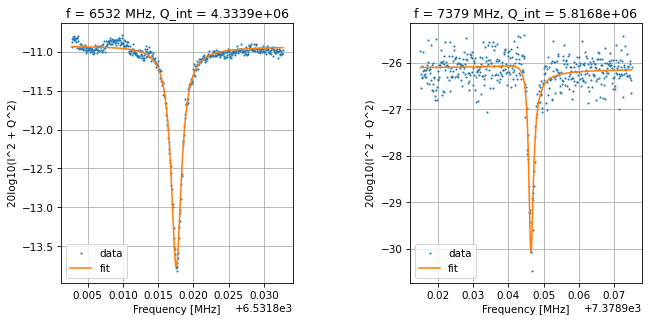

([array([ 6.53181754e+09,  4.33386909e+06,  1.12466985e+07, -6.59304853e+01,
         -1.09295240e+01]),
  array([ 7.37894628e+09,  5.81680195e+06,  1.02602264e+07, -5.48395608e+02,
         -2.61251156e+01])],
 [array([[ 8.28065380e+01,  5.62494568e+04,  2.14973661e+04,
           8.96533084e+01, -4.89642236e-04],
         [ 5.62494568e+04,  2.11880153e+09,  2.79785781e+09,
           7.55604709e+04, -5.86843330e+01],
         [ 2.14973661e+04,  2.79785781e+09,  7.34140260e+09,
           4.65411900e+04, -1.59134482e+02],
         [ 8.96533084e+01,  7.55604709e+04,  4.65411900e+04,
           1.55862481e+02, -1.07831500e-03],
         [-4.89642236e-04, -5.86843330e+01, -1.59134482e+02,
          -1.07831500e-03,  1.07356410e-05]]),
  array([[ 1.84536527e+03,  2.85185068e+06, -1.57728795e+06,
           2.67826704e+03,  2.96881240e-02],
         [ 2.85185068e+06,  1.01753797e+11,  7.15429870e+10,
           7.66357140e+06, -1.06249260e+03],
         [-1.57728795e+06,  7.15429870e+10,  

In [17]:
#RFSoC 10

# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [0.03, 0.06]

# center freqs
inputDict['res_f']=[6531.8177, 7378.945]
inputDict['names']=['4p42', '4p70']

# define numbers of points
inputDict['n_expts'] = 500  # number of points along the frequency axis
inputDict['n_rounds'] = 1 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 10000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
# idxs = [np.argmin(np.abs(np.array(f)-inputDict['res_f'][0])),np.argmin(np.abs(np.array(f)-inputDict['res_f'][1]))]
inputDict['basePowers'] = 0 # dBm
inputDict['gain'] = [30000, 30000]

# acquire data
# Acquire
inputDict['power'] = inputDict['basePowers']


Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='phase_test', inputDict=inputDict, soc=socs[0], soccfg=soccfgs[0])

with open(devnull,'w') as f:
    with redirect_stderr(f):
        data2 = mResSweepDouble.ResSweep.acquire(Instance2)
mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)

Frequencies out are: [7377.7, 7997.167] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 11.051 s


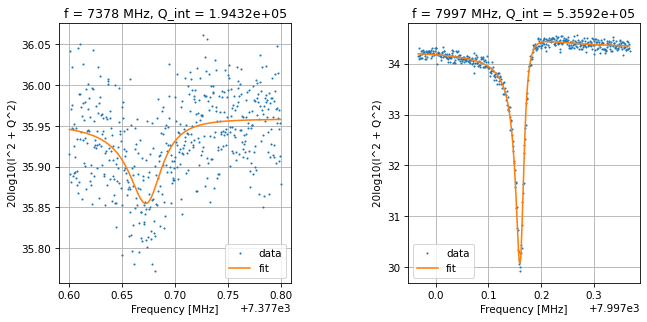

([array([7.37767421e+09, 1.94320586e+05, 1.65898506e+07, 2.91446441e+02,
         3.59570832e+01]),
  array([7.99716235e+09, 5.35919011e+05, 8.97327647e+05, 1.11411787e+04,
         3.42841894e+01])],
 [array([[ 6.06690261e+06,  1.22516838e+07,  2.14636441e+09,
           2.96515736e+05, -3.85254123e+00],
         [ 1.22516838e+07,  7.07491237e+08,  5.09472418e+10,
           1.41283386e+05, -6.74971996e+01],
         [ 2.14636441e+09,  5.09472418e+10,  5.30221307e+12,
           8.45927826e+07, -7.64205182e+03],
         [ 2.96515736e+05,  1.41283386e+05,  8.45927826e+07,
           2.17954771e+04, -1.90132790e-01],
         [-3.85254123e+00, -6.74971996e+01, -7.64205182e+03,
          -1.90132790e-01,  1.53208985e-05]]),
  array([[ 8.94293116e+03, -2.59672555e+04,  1.61466986e+05,
           1.37717583e+04, -5.24704417e-02],
         [-2.59672555e+04,  2.92116280e+07,  2.19807267e+07,
          -2.76842561e+05, -6.70831468e+00],
         [ 1.61466986e+05,  2.19807267e+07,  4.47063758

In [24]:
# RFSoC 11

# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [0.2,0.4]

# center freqs

inputDict['res_f']=[7377.7, 7997.167]
inputDict['names']=['4p42','4p70']
# define numbers of points
inputDict['n_expts'] = 500  # number of points along the frequency axis
inputDict['n_rounds'] = 1 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 10000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
# idxs = [np.argmin(np.abs(np.array(f)-inputDict['res_f'][0])),np.argmin(np.abs(np.array(f)-inputDict['res_f'][1]))]
inputDict['basePowers'] = 0 # dBm
inputDict['gain'] = [30000, 30000]

# acquire data
# Acquire
inputDict['power'] = inputDict['basePowers']
Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='phase_test', inputDict=inputDict, soc=socs[1], soccfg=soccfgs[1])

with open(devnull,'w') as f:
    with redirect_stderr(f):
        data2 = mResSweepDouble.ResSweep.acquire(Instance2)
mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)
# mResSweepDouble.ResSweep.save_data(Instance2, data2)

Frequencies out are: [4349.356, 4630.37] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 11.116 s


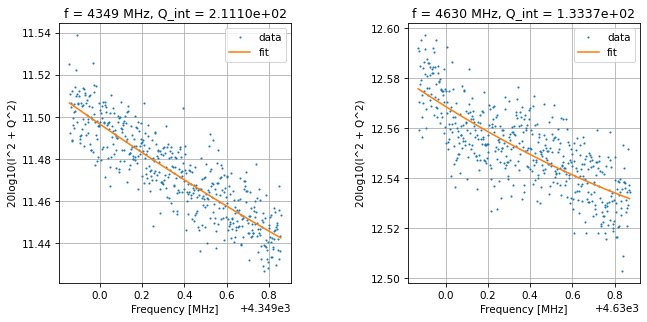

([array([ 4.34491036e+09,  2.11103595e+02,  2.89820314e+05, -7.46648310e+06,
          1.18067023e+01]),
  array([4.89069689e+09, 1.33373468e+02, 6.75053607e+04, 1.61637397e+09,
         3.54969929e+01])],
 [array([[ 4.53609801e+16,  9.54348535e+11, -1.78637811e+16,
           9.62282565e+16, -3.69106550e+09],
         [ 9.54348535e+11,  5.05376742e+07,  1.19107151e+13,
           4.79156708e+12, -3.27316958e+05],
         [-1.78637811e+16,  1.19107151e+13,  4.96447093e+18,
           1.07843533e+18, -9.92849438e+10],
         [ 9.62282565e+16,  4.79156708e+12,  1.07843533e+18,
           4.55527635e+17, -3.05144234e+10],
         [-3.69106550e+09, -3.27316958e+05, -9.92849438e+10,
          -3.05144234e+10,  2.34743612e+03]]),
  array([[4.87572723e+21, 5.87906755e+13, 2.01260196e+16, 3.07759392e+22,
          1.58952410e+14],
         [5.87906755e+13, 7.09976430e+05, 9.31677173e+06, 3.71091275e+14,
          1.91669354e+06],
         [2.01260196e+16, 9.31677173e+06, 1.32867349e+16, 1.

In [26]:
# RFSoC 12

# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [1, 1]

# center freqs

inputDict['res_f']=[4349.356,4630.37]
inputDict['names']=['4p42',
  '4p70']
# define numbers of points
inputDict['n_expts'] = 500  # number of points along the frequency axis
inputDict['n_rounds'] = 1 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point
# inputDict['n_reps'] = 1

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 10000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
# idxs = [np.argmin(np.abs(np.array(f)-inputDict['res_f'][0])),np.argmin(np.abs(np.array(f)-inputDict['res_f'][1]))]
inputDict['basePowers'] = 0 # dBm
inputDict['gain'] = [30000, 30000]

# acquire data
# Acquire
inputDict['power'] = inputDict['basePowers']
Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='phase_test', inputDict=inputDict, soc=socs[2], soccfg=soccfgs[2])

with open(devnull,'w') as f:
    with redirect_stderr(f):
        data2 = mResSweepDouble.ResSweep.acquire(Instance2)
mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)
# mResSweepDouble.ResSweep.save_data(Instance2, data2)

Frequencies out are: [7386.783, 7998.15] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 10.991 s


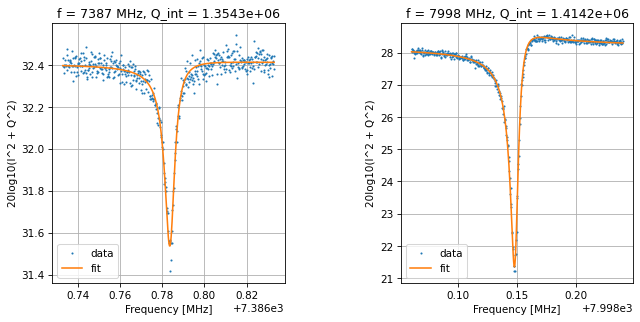

In [34]:
# RFSoC 13

# define sweep params
inputDict = {}
inputDict['LO_f'] = 0  # local oscillator frequency

# define frequencies
inputDict['span_f'] = [.1, .18]

# center freqs

inputDict['res_f']=[7386.783,7998.15]
inputDict['names']=['4p42',
  '4p70']
# define numbers of points
inputDict['n_expts'] = 500  # number of points along the frequency axis
inputDict['n_rounds'] = 1 # number of times to sweep along the frequency axis
inputDict['n_reps'] = 1  # number of repetitions to take at each frequency point
# inputDict['n_reps'] = 1

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 10000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
# idxs = [np.argmin(np.abs(np.array(f)-inputDict['res_f'][0])),np.argmin(np.abs(np.array(f)-inputDict['res_f'][1]))]
inputDict['basePowers'] = 0 # dBm
inputDict['gain'] = [30000, 30000]

# acquire data
# Acquire
inputDict['power'] = inputDict['basePowers']
Instance2 = mResSweepDouble.ResSweep(path=savePath, prefix='phase_test', inputDict=inputDict, soc=socs[3], soccfg=soccfgs[3])

with open(devnull,'w') as f:
    with redirect_stderr(f):
        data2 = mResSweepDouble.ResSweep.acquire(Instance2)
pOpt,pCov= mResSweepDouble.ResSweep.display(Instance2, data2, fit=True)
# mResSweepDouble.ResSweep.save_data(Instance2, data2)

In [37]:
lw1 = pOpt[0][0] * ((1 / pOpt[0][1]) + (1 / pOpt[0][2])) / 1e6
lw2 = pOpt[1][0] * ((1 / pOpt[1][1]) + (1 / pOpt[1][2])) / 1e6
num_lws=20
print(num_lws*lw1,num_lws*lw2)

0.12052910168118734 0.24003935627700912


In [ ]:
tc.setTemp(0.250)

In [ ]:
temps=np.arange(0.030,0.290,0.020)
print(temps)

In [8]:
temps = np.arange(.170,.7,.03)
print(temps)

[0.17 0.2  0.23 0.26 0.29 0.32 0.35 0.38 0.41 0.44 0.47 0.5  0.53 0.56
 0.59 0.62 0.65 0.68]


# Take measurements

In [ ]:
attobj = CLI_Vaunix_Attn()
attobj.set_attenuation(1,15,1)
attobj.set_attenuation(1,35,2)
attobj.set_attenuation(1,5,3)
attobj.set_attenuation(1,5,4)

[0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.065 0.08  0.095 0.11
 0.125 0.14 ]
new


  0%|          | 0/14 [00:00<?, ?it/s]

Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.236 s


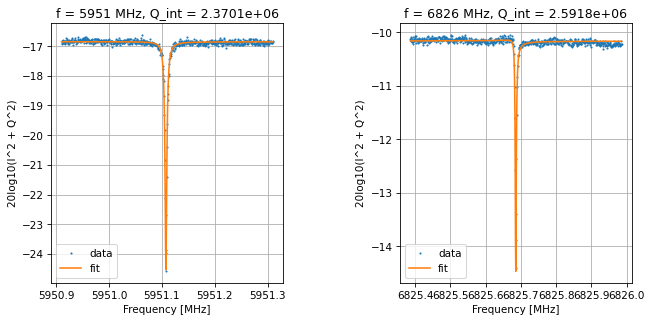

Frequencies out are: [5951.107477067033, 6825.685185854077] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.661 s


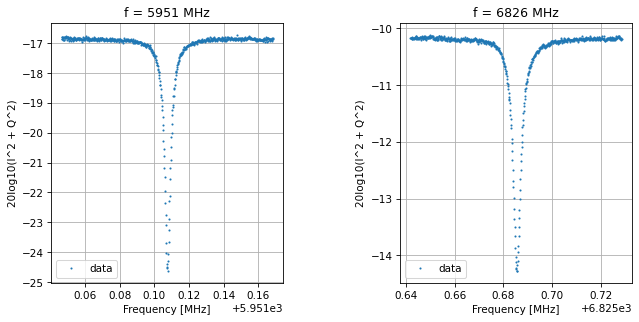

Saving data-2023-11-11-14-54-31
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.738 s


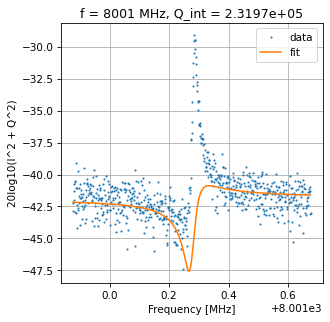

Frequencies out are: [8001.284294181749] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.053 s


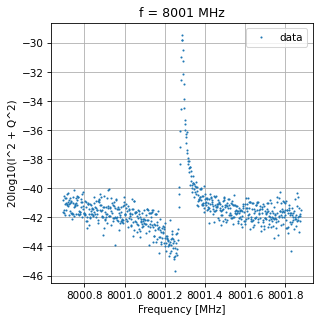

Saving data-2023-11-11-14-55-31
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.062 s


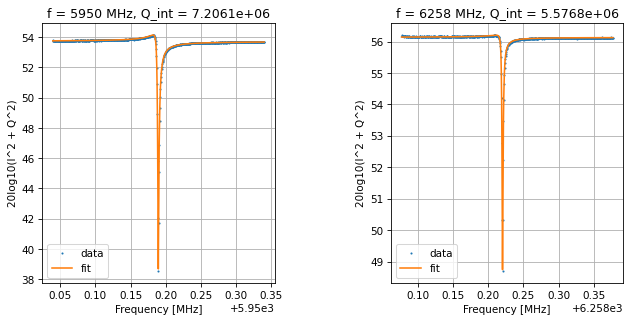

Frequencies out are: [5950.188646998891, 6258.220144849046] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.598 s


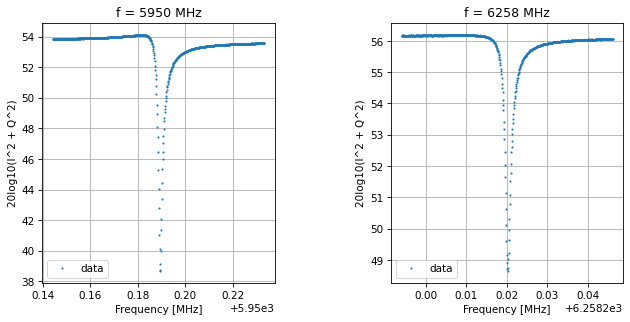

Saving data-2023-11-11-14-56-25
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.296 s


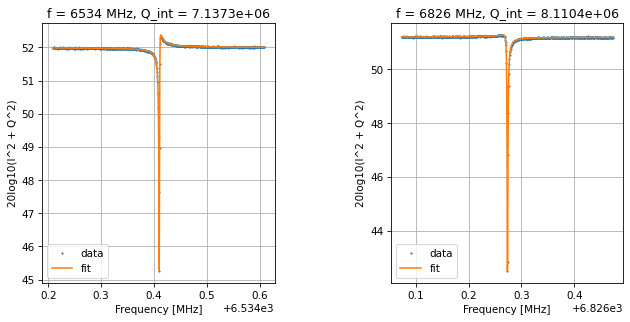

Frequencies out are: [6534.410236999766, 6826.273356624454] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.450 s


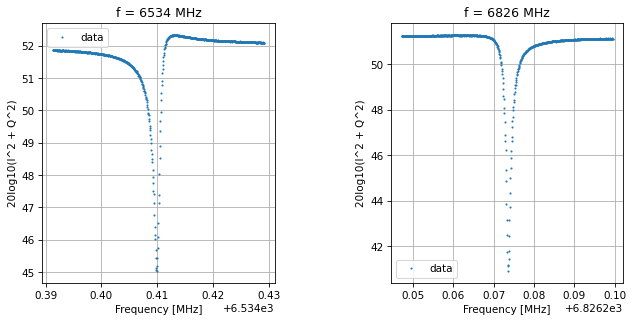

Saving data-2023-11-11-14-57-28
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.112 s


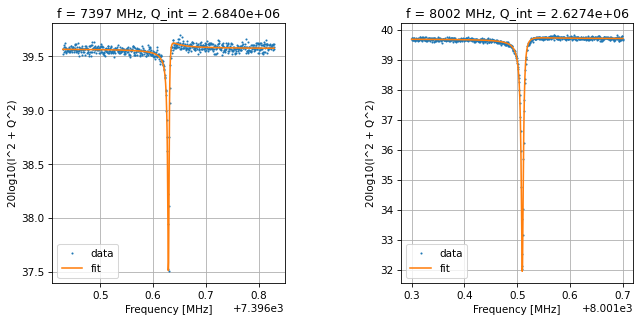

Frequencies out are: [7396.6294391675465, 8001.510024912155] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.373 s


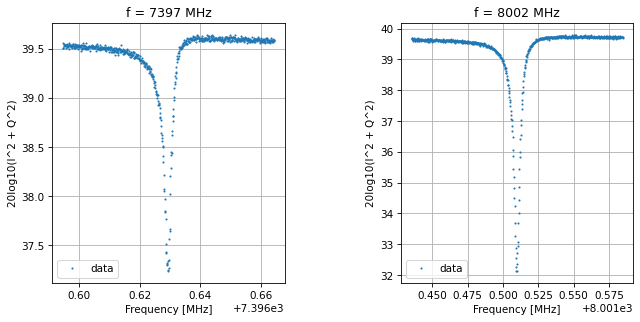

Saving data-2023-11-11-14-58-30
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.230 s


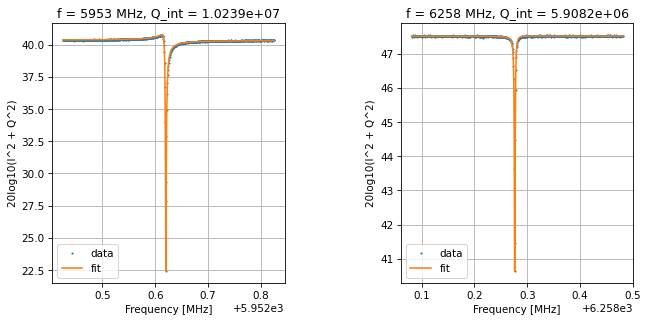

Frequencies out are: [5952.61931680975, 6258.276374484867] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.668 s


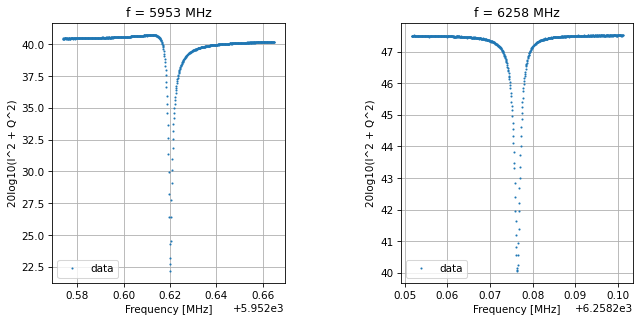

Saving data-2023-11-11-14-59-33
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.181 s


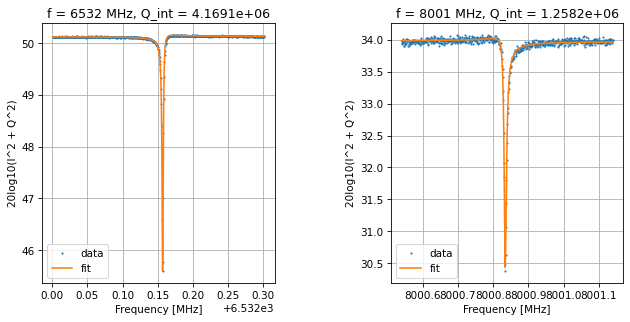

Frequencies out are: [6532.1570848815045, 8000.833813614153] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.677 s


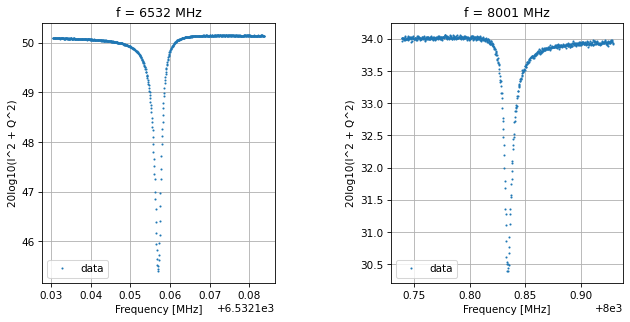

  7%|▋         | 1/14 [47:06<10:12:30, 2826.95s/it]

Saving data-2023-11-11-15-00-35
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.192 s


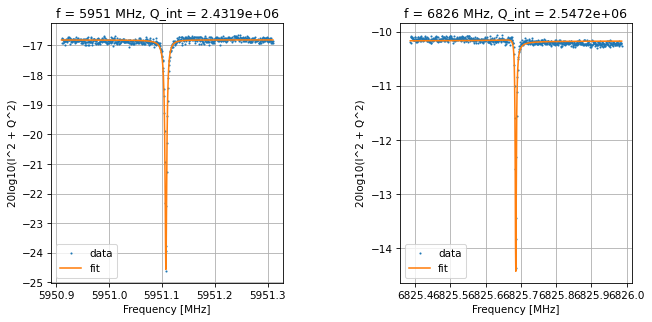

Frequencies out are: [5951.107536101017, 6825.685194368075] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.767 s


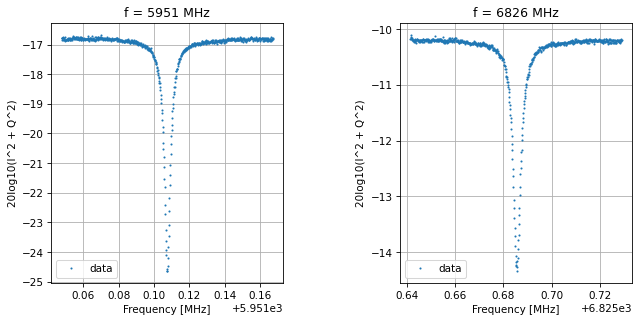

Saving data-2023-11-11-15-41-38
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.525 s


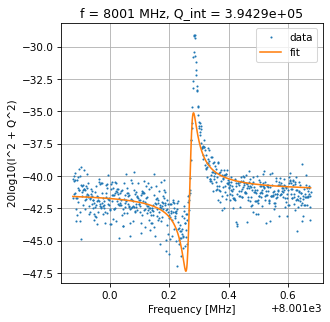

Frequencies out are: [8001.276835689874] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 37.949 s


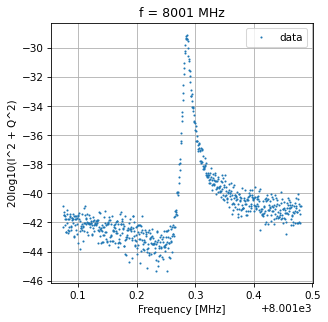

Saving data-2023-11-11-15-42-38
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.093 s


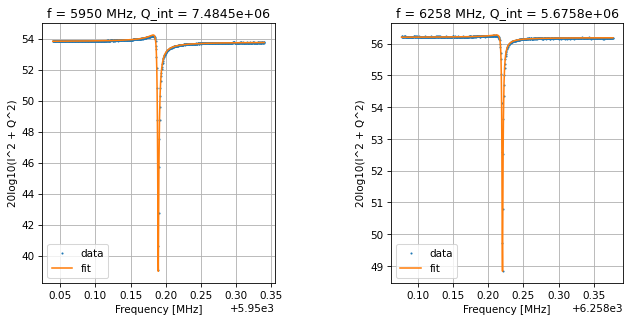

Frequencies out are: [5950.188558282805, 6258.220055658961] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.348 s


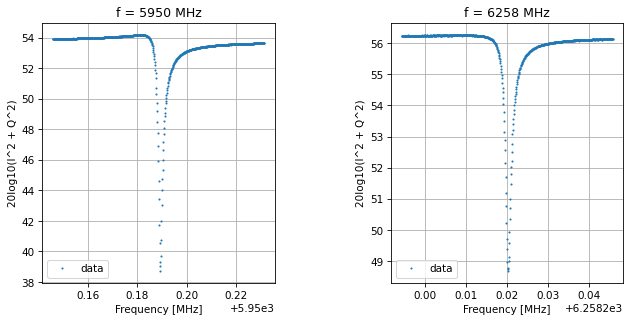

Saving data-2023-11-11-15-43-32
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.255 s


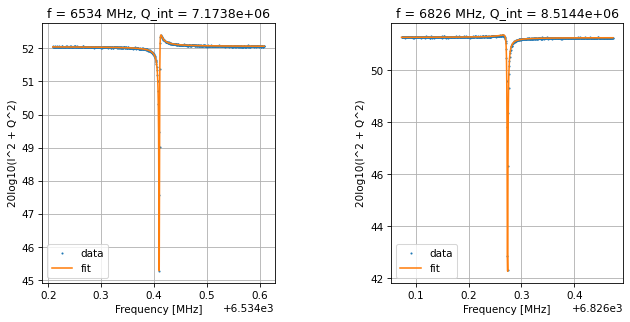

Frequencies out are: [6534.410218011689, 6826.273394982413] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.448 s


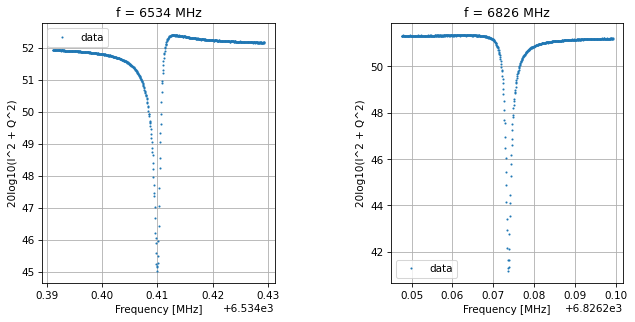

Saving data-2023-11-11-15-44-34
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.000 s


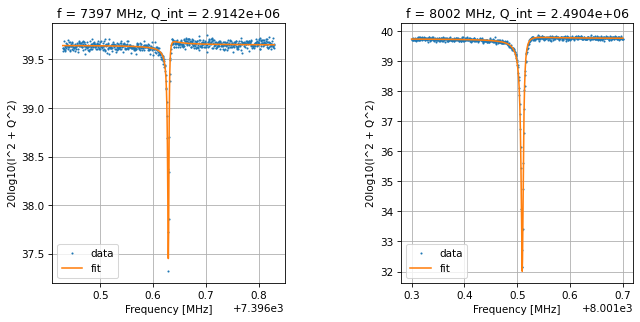

Frequencies out are: [7396.629211649802, 8001.509879737761] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.043 s


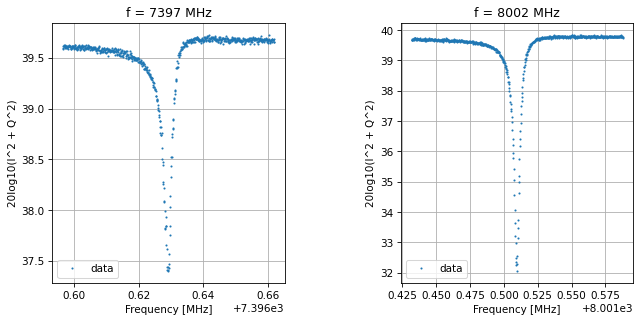

Saving data-2023-11-11-15-45-37
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.099 s


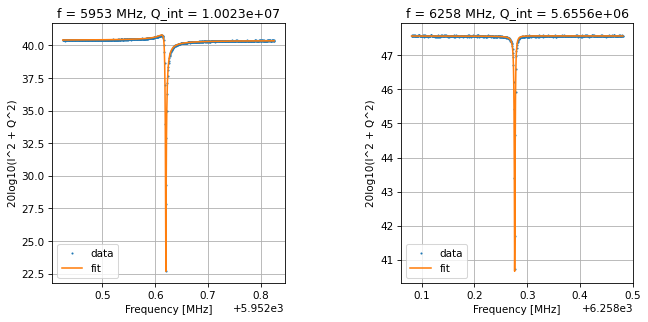

Frequencies out are: [5952.619308818831, 6258.27633619243] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.276 s


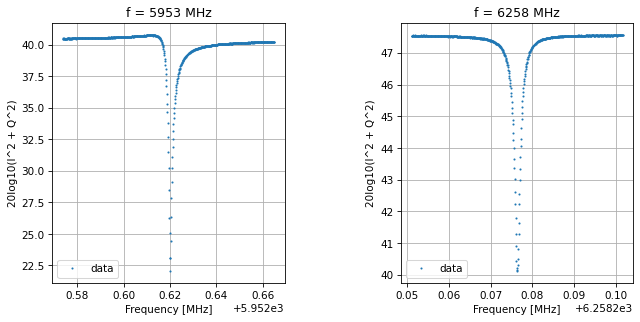

Saving data-2023-11-11-15-46-39
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.271 s


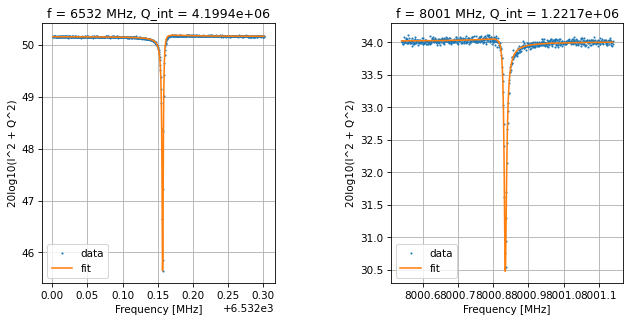

Frequencies out are: [6532.157063121891, 8000.833997289479] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.755 s


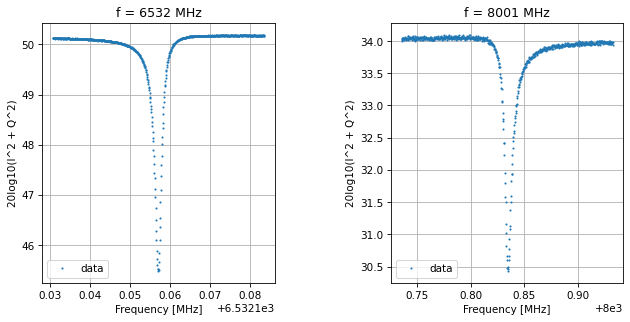

 14%|█▍        | 2/14 [1:34:12<9:25:15, 2826.30s/it]

Saving data-2023-11-11-15-47-41
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.264 s


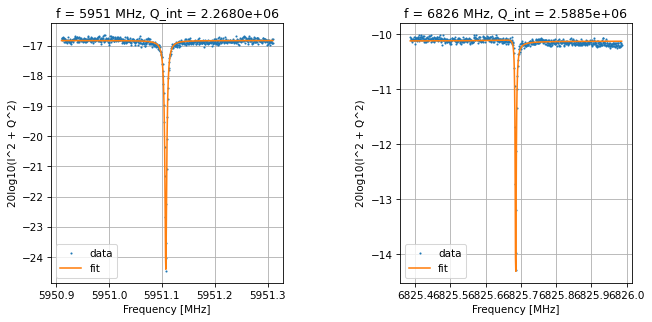

Frequencies out are: [5951.107324722695, 6825.685058394053] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.001 s


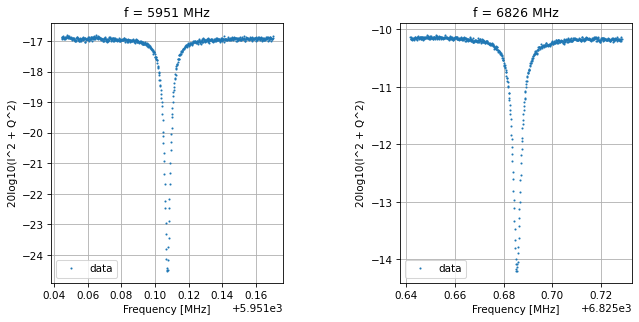

Saving data-2023-11-11-16-28-44
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.664 s


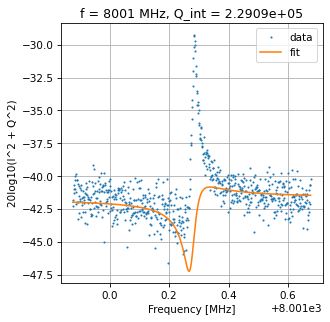

Frequencies out are: [8001.283535804728] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 37.947 s


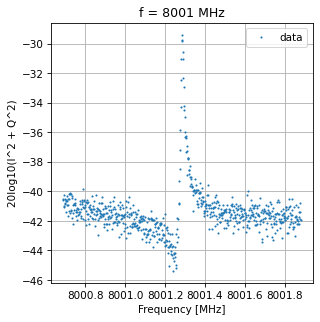

Saving data-2023-11-11-16-29-44
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.213 s


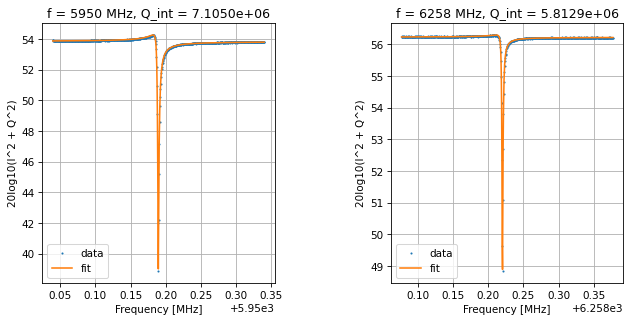

Frequencies out are: [5950.188633707078, 6258.220035823287] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.288 s


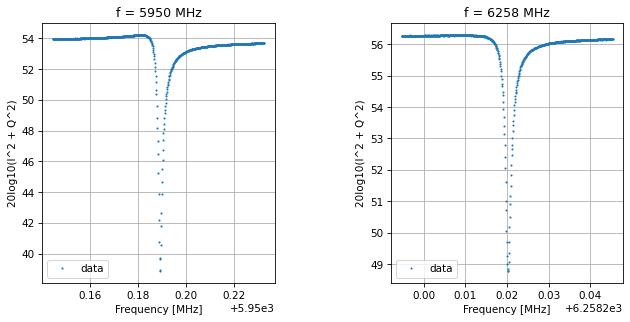

Saving data-2023-11-11-16-30-38
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 14.991 s


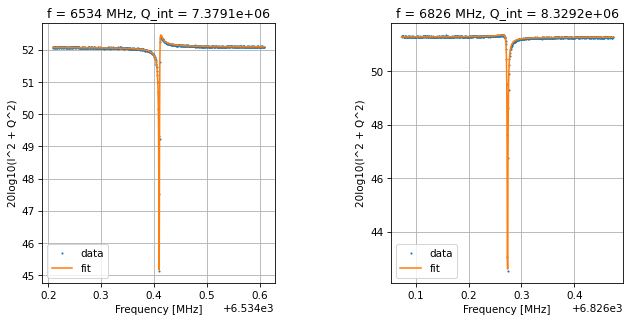

Frequencies out are: [6534.410204069815, 6826.27340381513] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.742 s


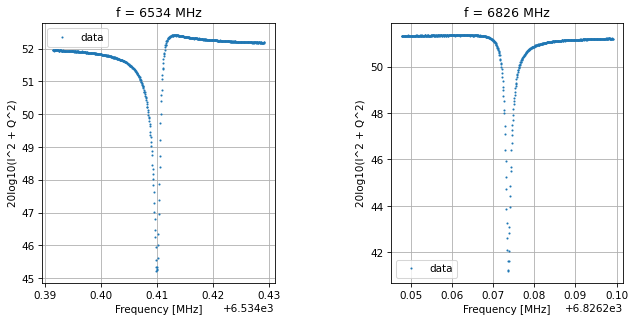

Saving data-2023-11-11-16-31-41
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 14.992 s


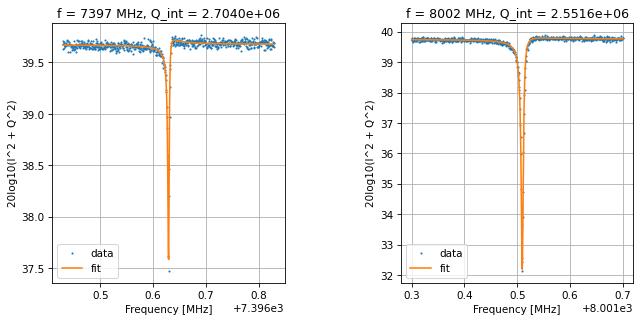

Frequencies out are: [7396.62961104922, 8001.509901947113] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.187 s


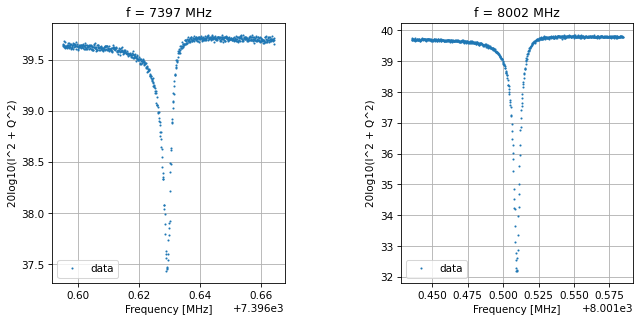

Saving data-2023-11-11-16-32-43
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.235 s


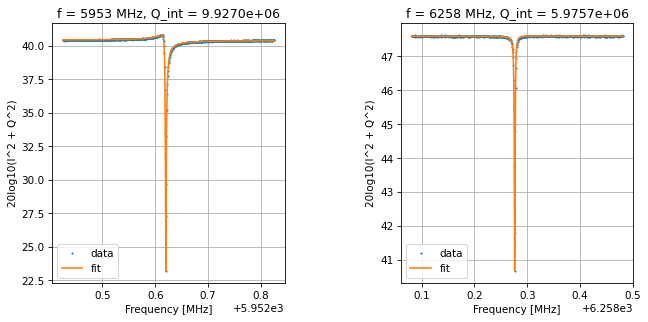

Frequencies out are: [5952.619273607786, 6258.276344163098] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.796 s


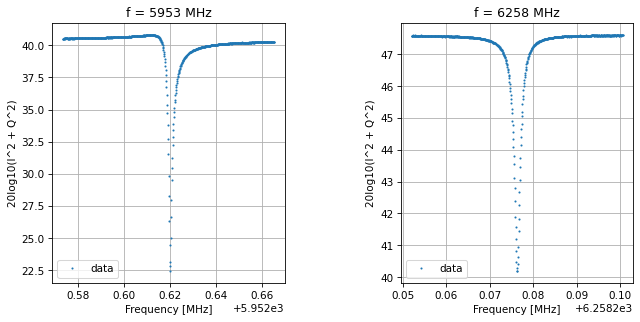

Saving data-2023-11-11-16-33-45
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.375 s


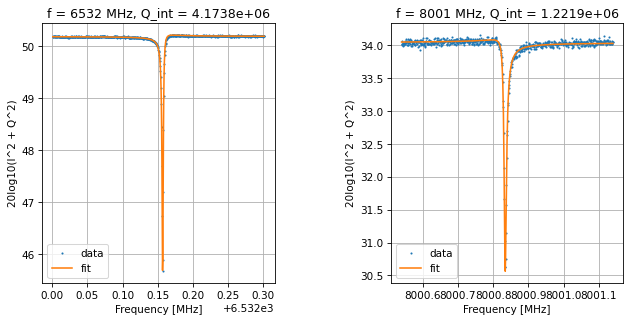

Frequencies out are: [6532.157072311969, 8000.833681314733] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.045 s


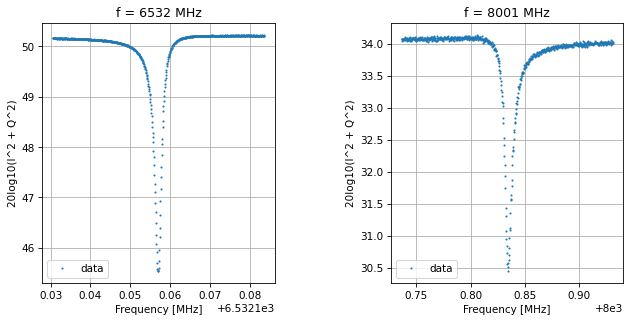

 21%|██▏       | 3/14 [2:21:20<8:38:15, 2826.85s/it]

Saving data-2023-11-11-16-34-48
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.349 s


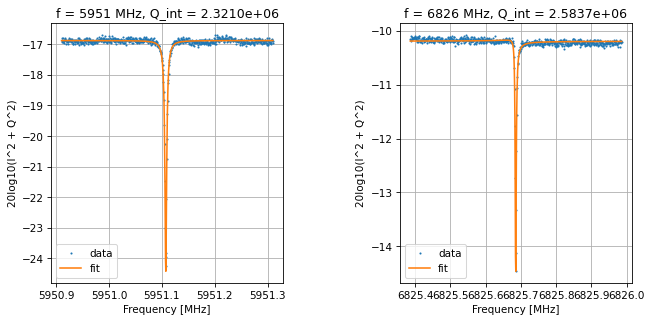

Frequencies out are: [5951.107297255895, 6825.685067256748] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.243 s


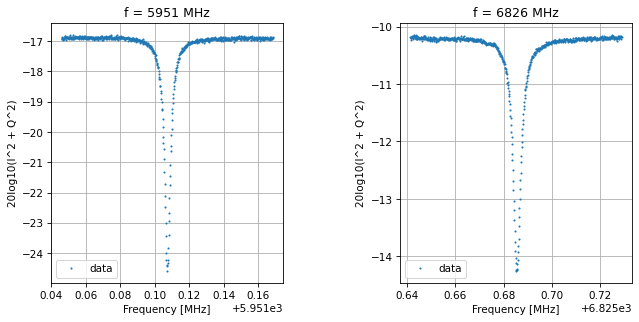

Saving data-2023-11-11-17-15-51
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.708 s


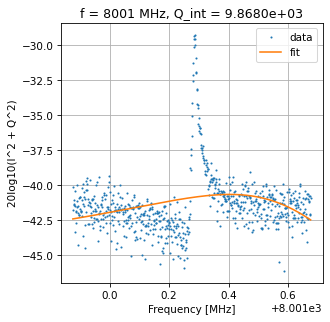

Frequencies out are: [8001.586454621333] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 37.788 s


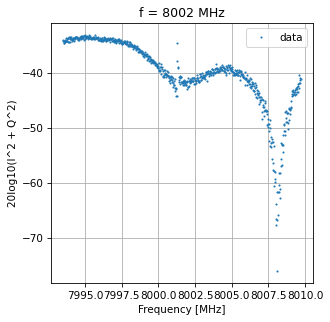

Saving data-2023-11-11-17-16-52
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.239 s


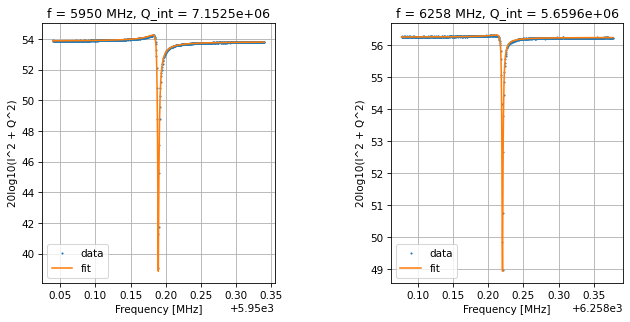

Frequencies out are: [5950.188602378505, 6258.220063981987] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.649 s


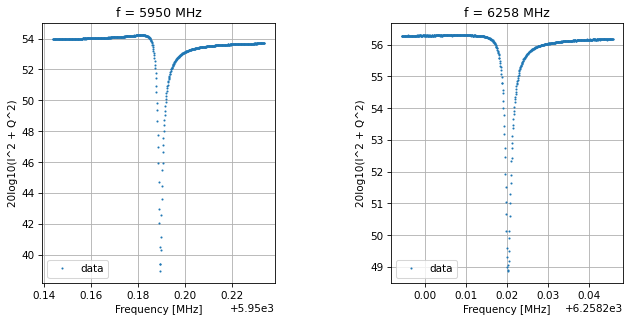

Saving data-2023-11-11-17-17-46
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.283 s


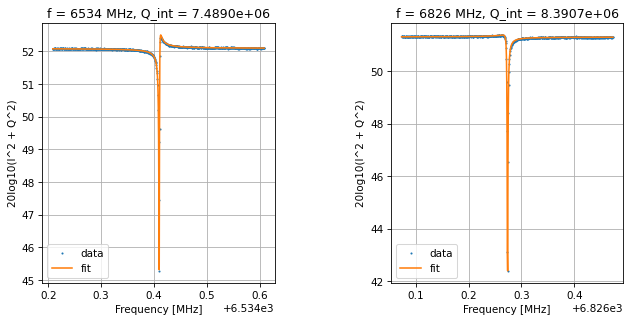

Frequencies out are: [6534.410172308267, 6826.273423548637] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.724 s


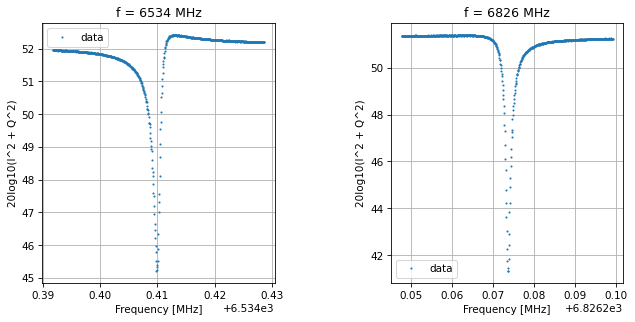

Saving data-2023-11-11-17-18-49
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.119 s


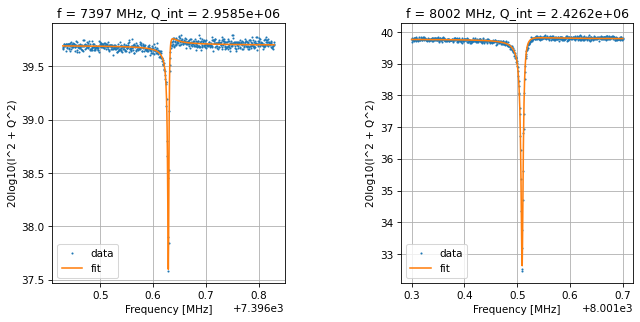

Frequencies out are: [7396.629271381176, 8001.509615470677] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.505 s


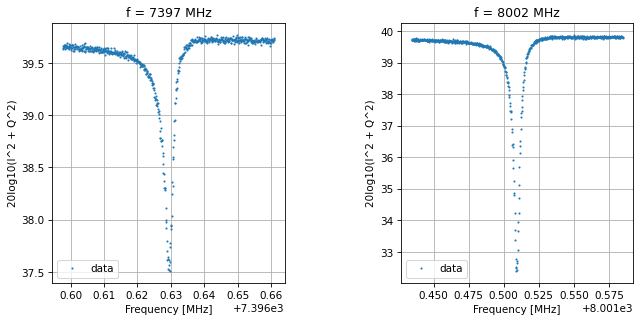

Saving data-2023-11-11-17-19-51
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.290 s


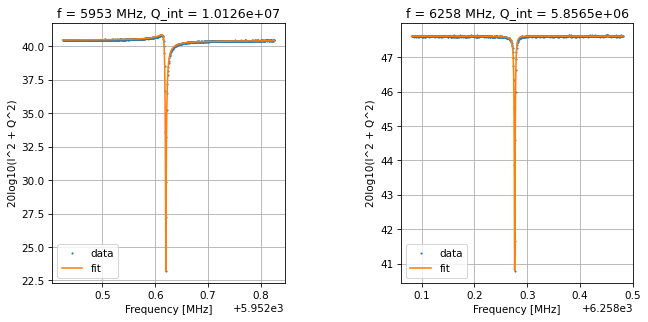

Frequencies out are: [5952.619268777132, 6258.276366107318] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.724 s


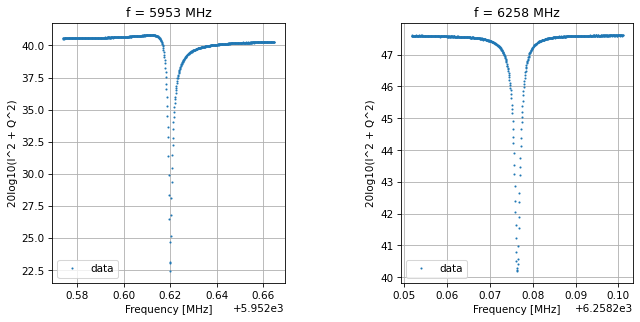

Saving data-2023-11-11-17-20-54
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.210 s


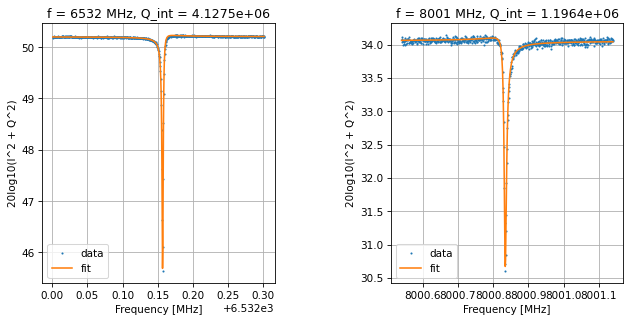

Frequencies out are: [6532.157012316565, 8000.833901523372] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.628 s


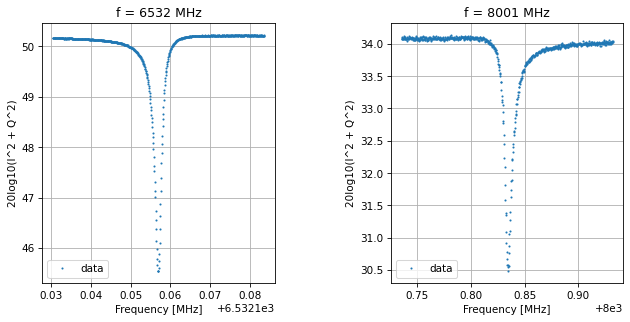

 29%|██▊       | 4/14 [3:08:28<7:51:13, 2827.33s/it]

Saving data-2023-11-11-17-21-57
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.361 s


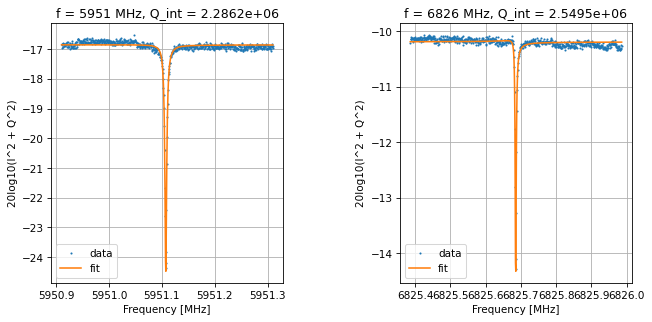

Frequencies out are: [5951.107219694452, 6825.685002603944] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.263 s


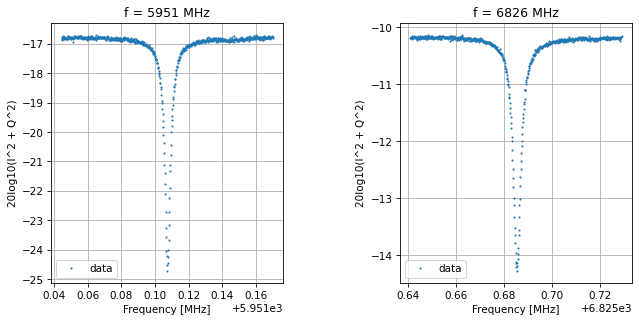

Saving data-2023-11-11-18-03-00
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.885 s


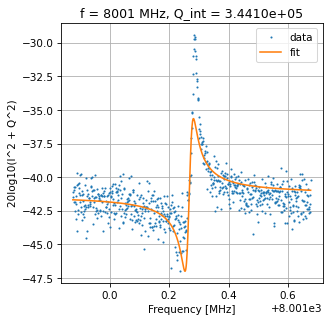

Frequencies out are: [8001.275660369634] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.592 s


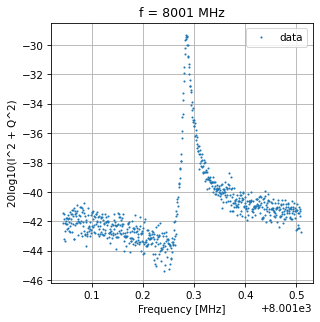

Saving data-2023-11-11-18-04-00
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.406 s


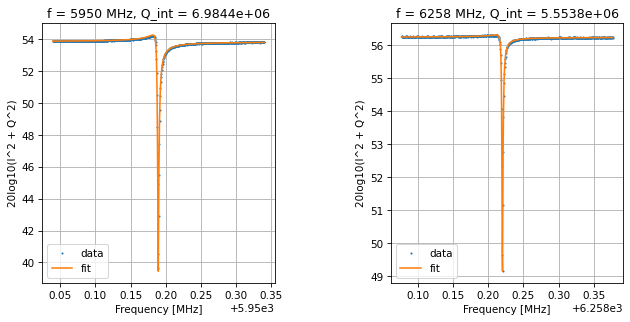

Frequencies out are: [5950.1885123706525, 6258.220018969335] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.373 s


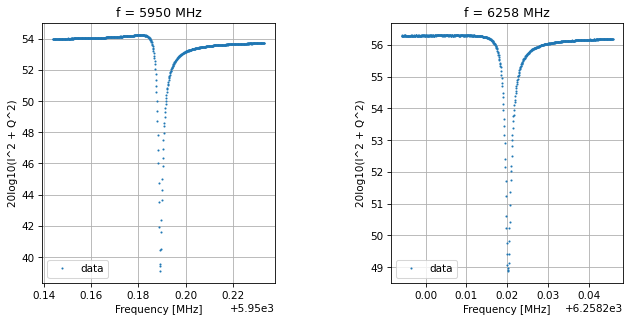

Saving data-2023-11-11-18-04-55
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.677 s


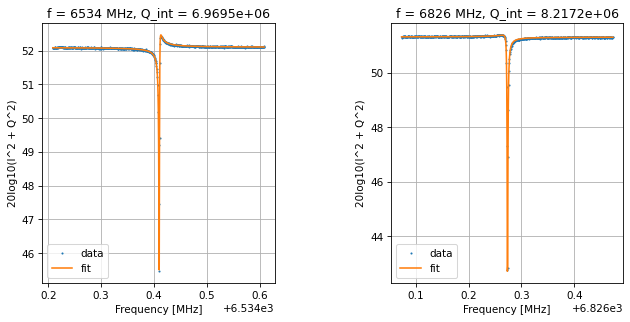

Frequencies out are: [6534.410176260536, 6826.273378972824] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.606 s


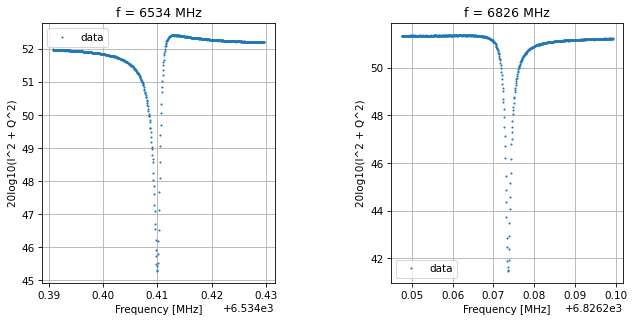

Saving data-2023-11-11-18-05-59
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.519 s


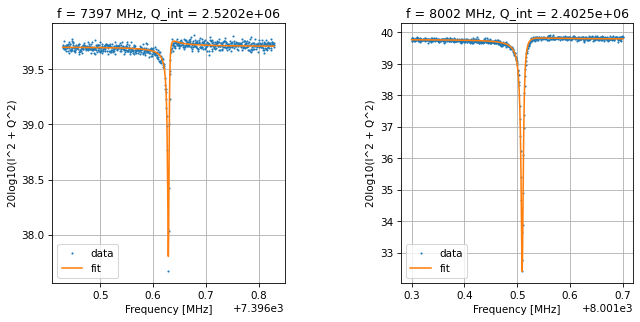

Frequencies out are: [7396.629326500948, 8001.509833688211] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.459 s


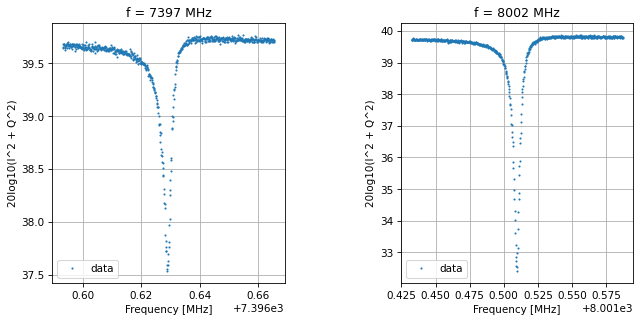

Saving data-2023-11-11-18-07-03
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.420 s


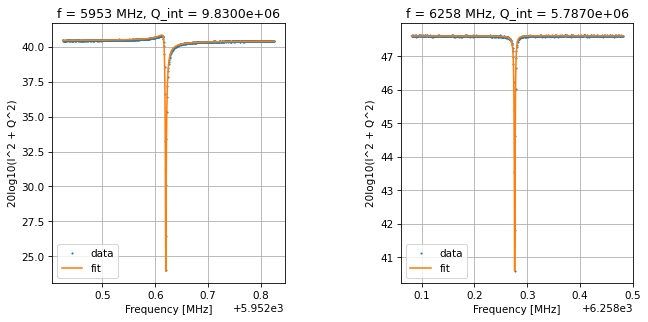

Frequencies out are: [5952.619202121924, 6258.276323238188] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.448 s


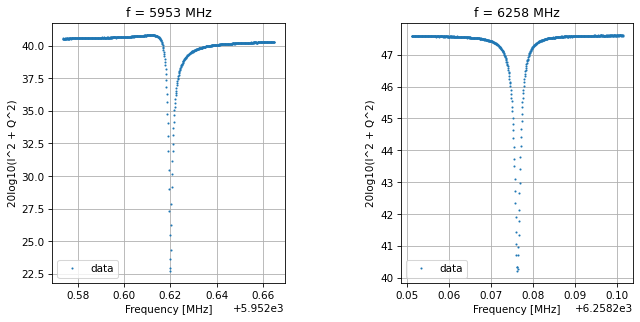

Saving data-2023-11-11-18-08-07
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.468 s


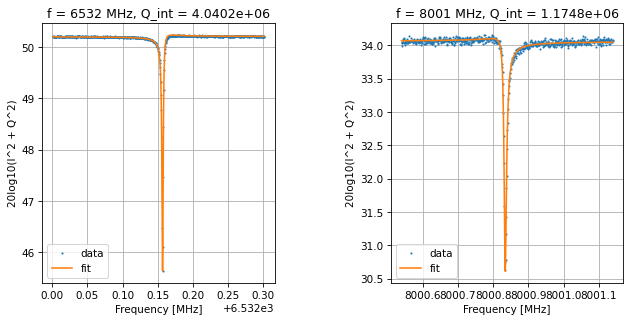

Frequencies out are: [6532.156995769629, 8000.833795552921] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.355 s


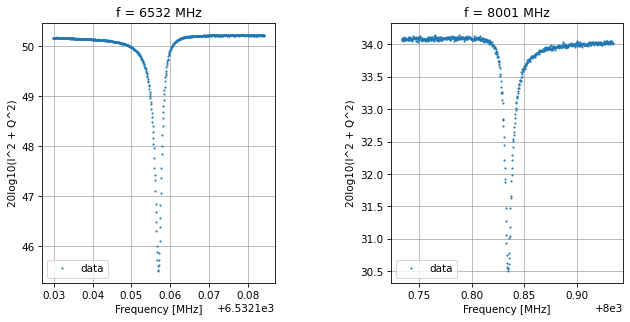

 36%|███▌      | 5/14 [3:55:42<7:04:28, 2829.84s/it]

Saving data-2023-11-11-18-09-10
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.502 s


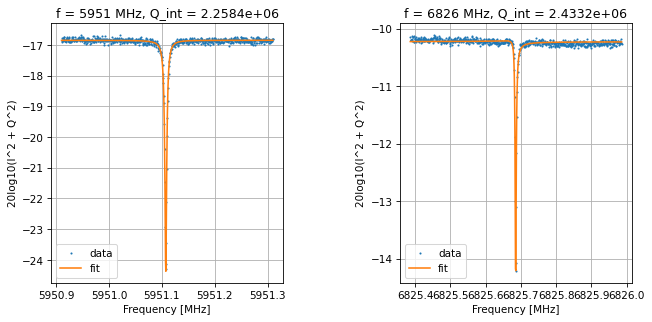

Frequencies out are: [5951.107302496825, 6825.684977840037] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.255 s


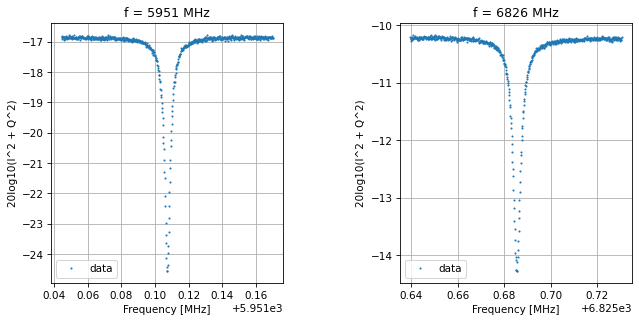

Saving data-2023-11-11-18-50-14
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.836 s


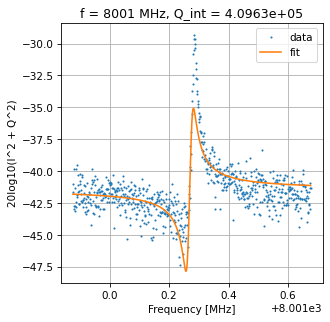

Frequencies out are: [8001.27698535957] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.547 s


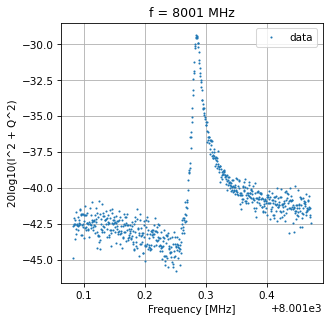

Saving data-2023-11-11-18-51-14
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.570 s


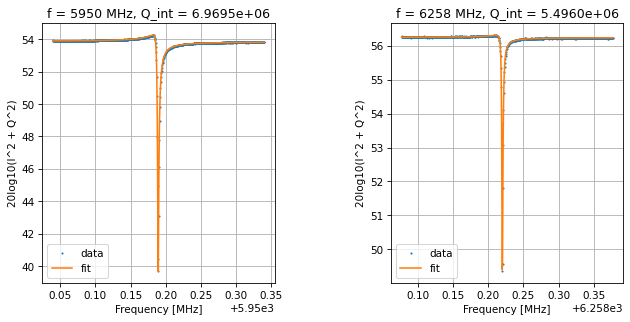

Frequencies out are: [5950.188507715355, 6258.219923314346] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.255 s


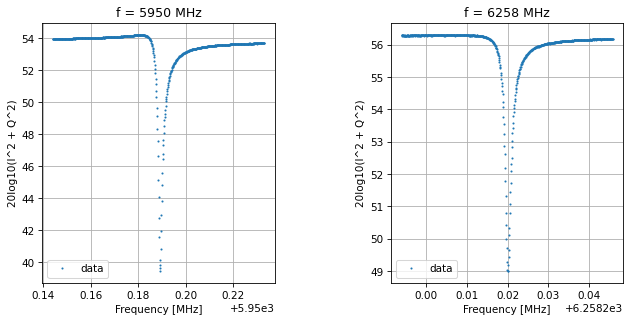

Saving data-2023-11-11-18-52-10
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.459 s


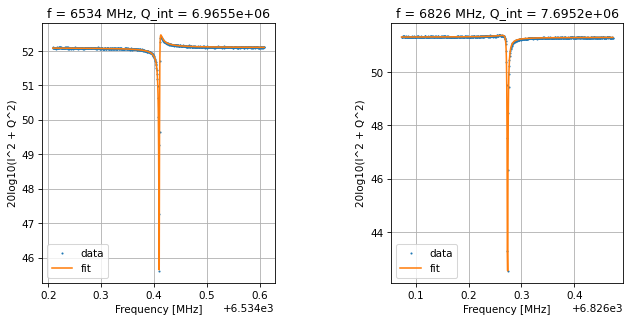

Frequencies out are: [6534.410142207526, 6826.273428792301] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.588 s


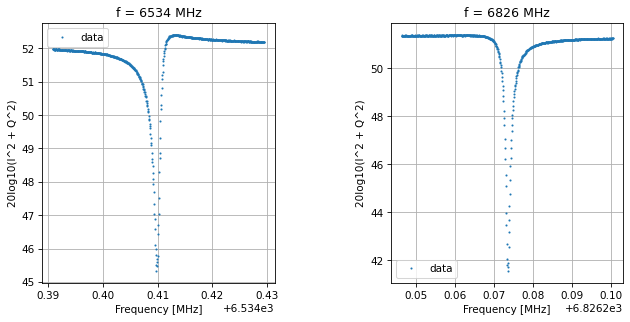

Saving data-2023-11-11-18-53-13
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.582 s


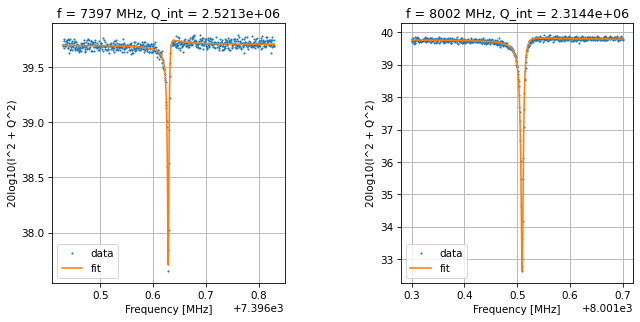

Frequencies out are: [7396.6290959668295, 8001.509739521695] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.215 s


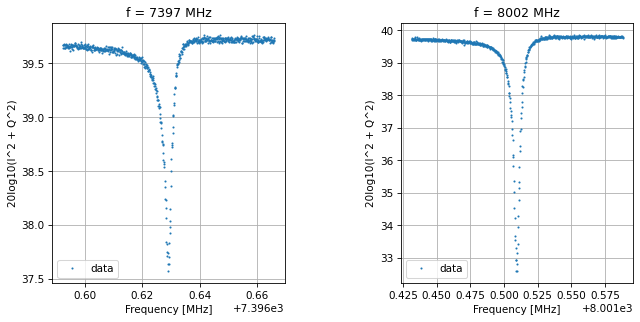

Saving data-2023-11-11-18-54-17
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.268 s


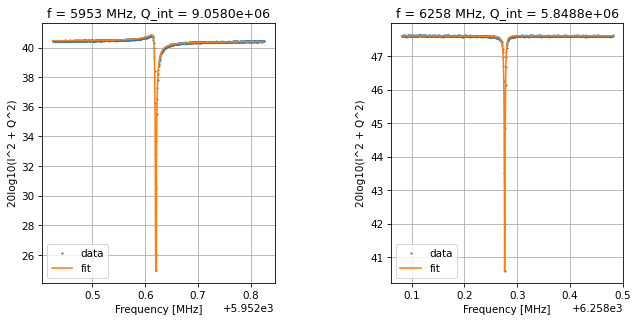

Frequencies out are: [5952.619148855168, 6258.276306990833] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.455 s


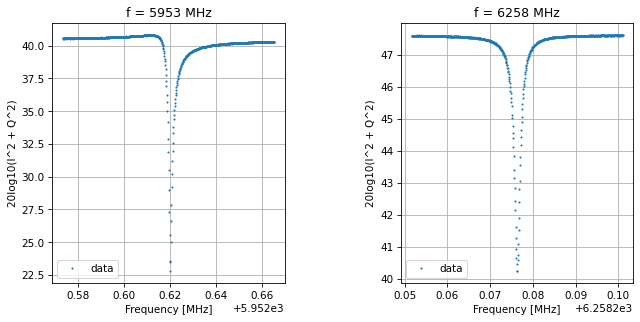

Saving data-2023-11-11-18-55-21
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.397 s


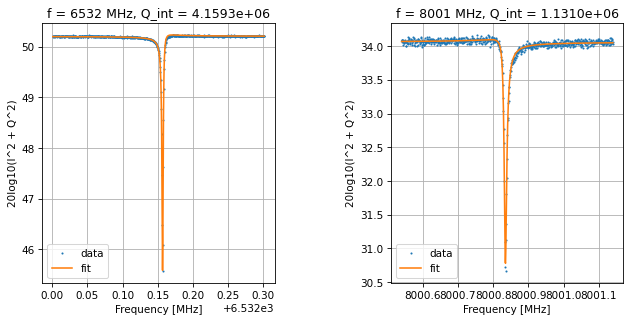

Frequencies out are: [6532.1569737138225, 8000.834240014422] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 45.916 s


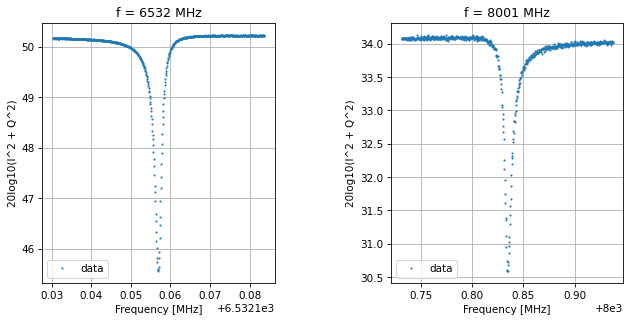

 43%|████▎     | 6/14 [4:42:56<6:17:28, 2831.05s/it]

Saving data-2023-11-11-18-56-24
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.557 s


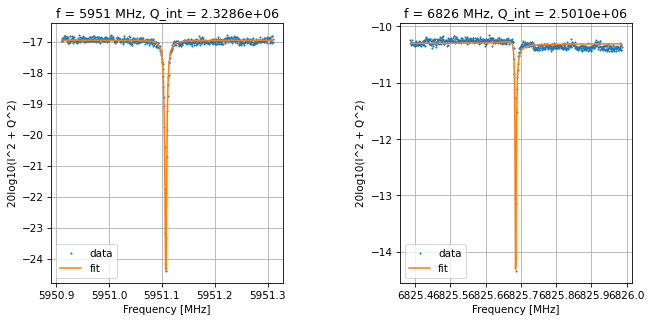

Frequencies out are: [5951.107128399197, 6825.684859285593] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.772 s


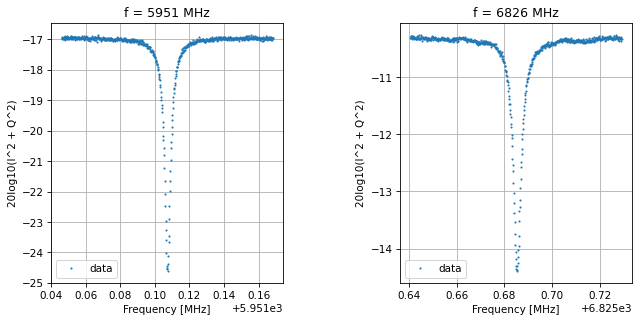

Saving data-2023-11-11-19-37-27
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.889 s


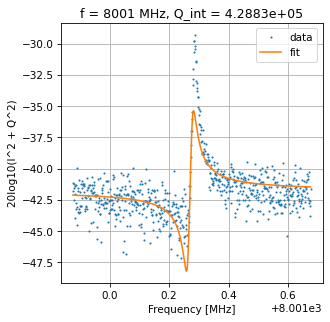

Frequencies out are: [8001.277752174655] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.345 s


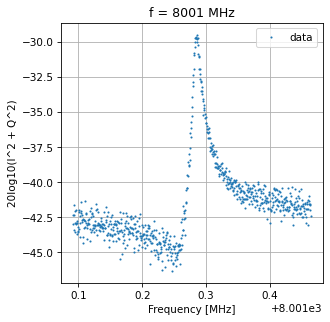

Saving data-2023-11-11-19-38-29
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.348 s


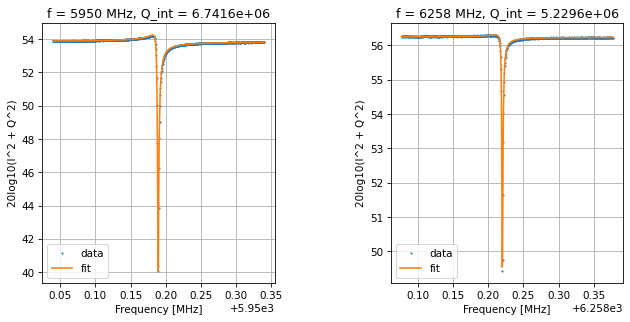

Frequencies out are: [5950.188435107904, 6258.219921283625] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.402 s


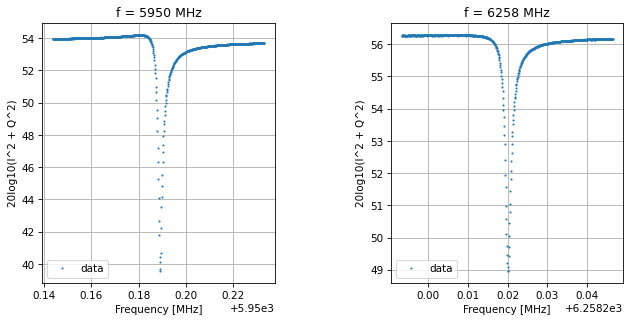

Saving data-2023-11-11-19-39-24
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.573 s


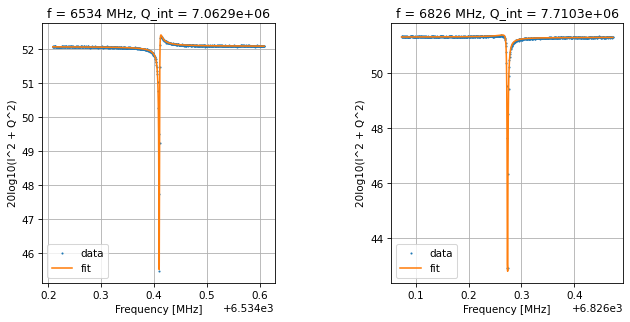

Frequencies out are: [6534.410200779811, 6826.273386190006] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.421 s


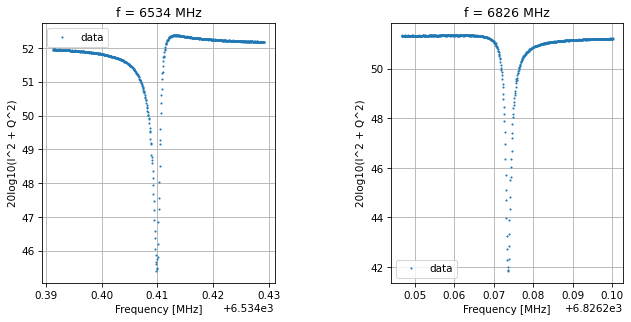

Saving data-2023-11-11-19-40-27
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.520 s


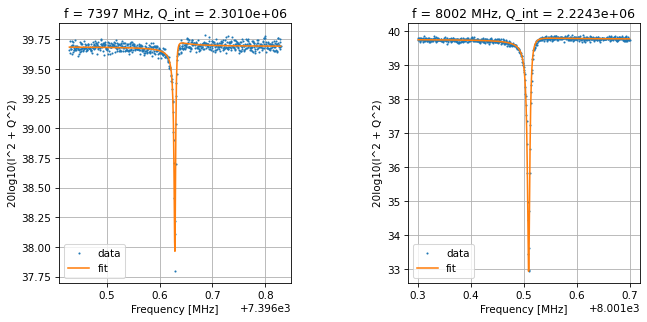

Frequencies out are: [7396.629059521593, 8001.509464084127] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.592 s


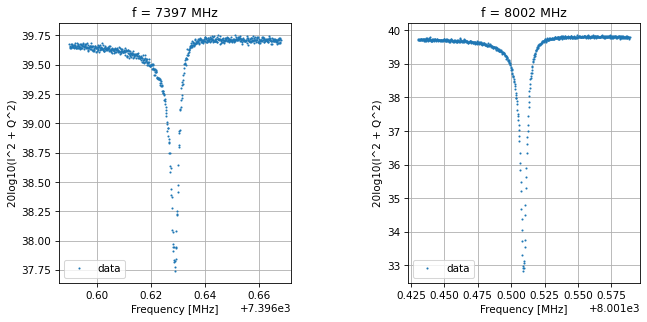

Saving data-2023-11-11-19-41-31
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.341 s


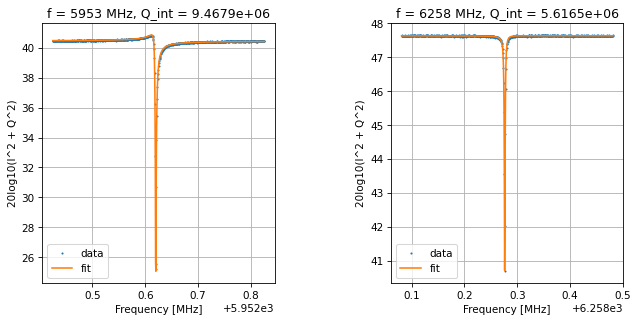

Frequencies out are: [5952.619139662621, 6258.276310491549] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.127 s


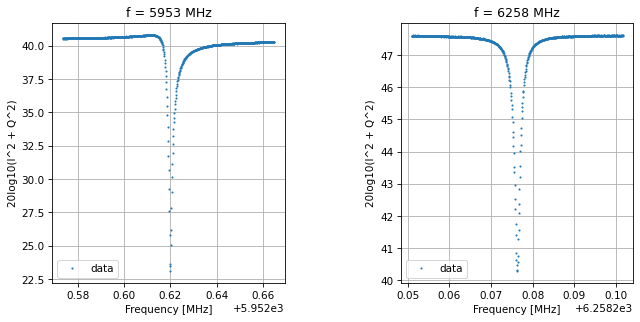

Saving data-2023-11-11-19-42-35
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.417 s


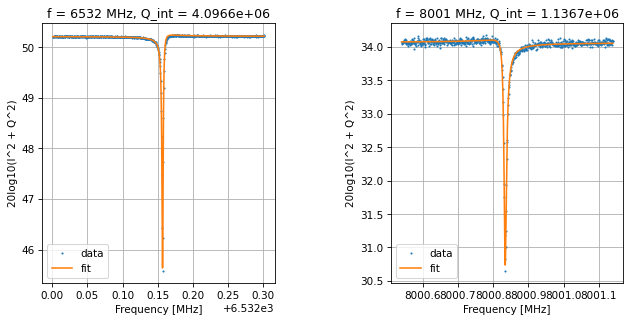

Frequencies out are: [6532.156939390293, 8000.8336568864715] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.176 s


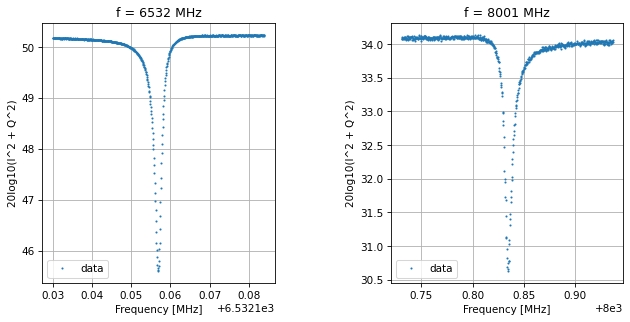

 50%|█████     | 7/14 [5:30:10<5:30:24, 2832.09s/it]

Saving data-2023-11-11-19-43-38
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.424 s


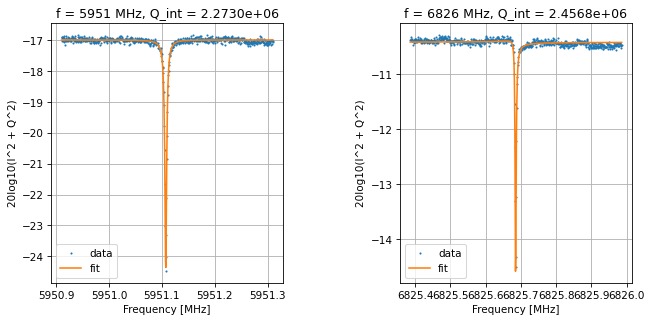

Frequencies out are: [5951.107255520166, 6825.68479334662] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.504 s


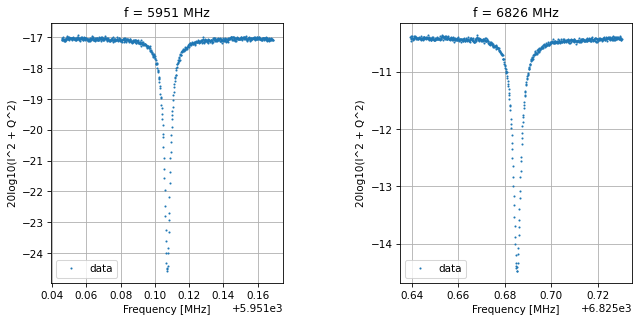

Saving data-2023-11-11-20-24-42
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.859 s


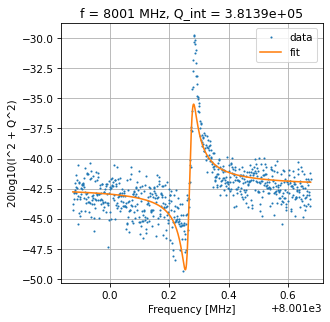

Frequencies out are: [8001.277582152665] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.840 s


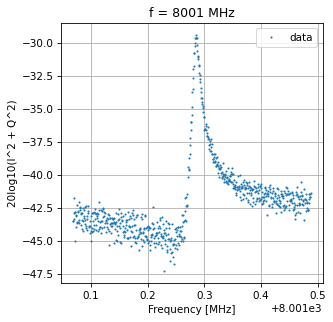

Saving data-2023-11-11-20-25-42
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.507 s


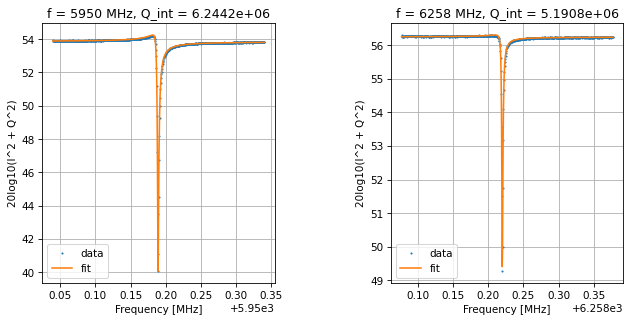

Frequencies out are: [5950.18834179973, 6258.219882237147] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.377 s


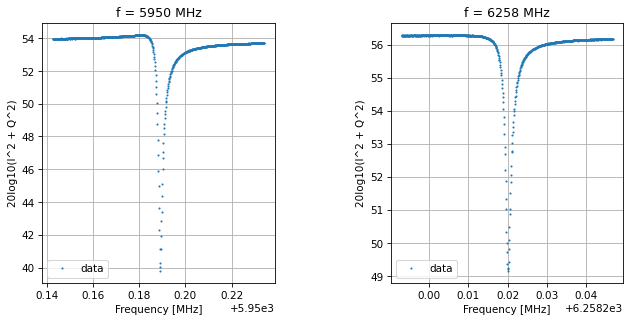

Saving data-2023-11-11-20-26-38
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.376 s


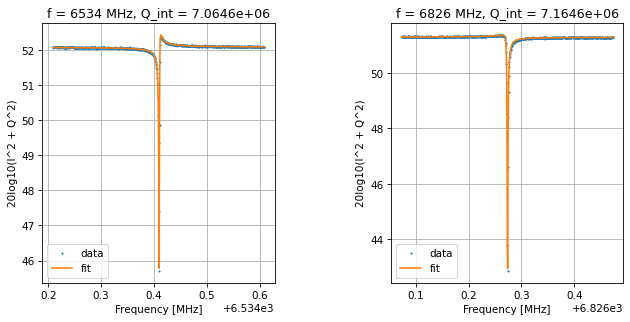

Frequencies out are: [6534.4101191885375, 6826.273436538607] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.636 s


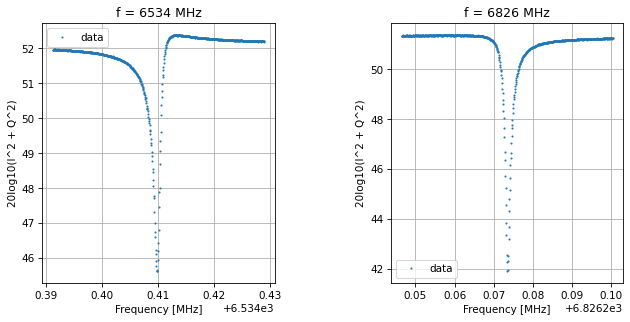

Saving data-2023-11-11-20-27-41
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.766 s


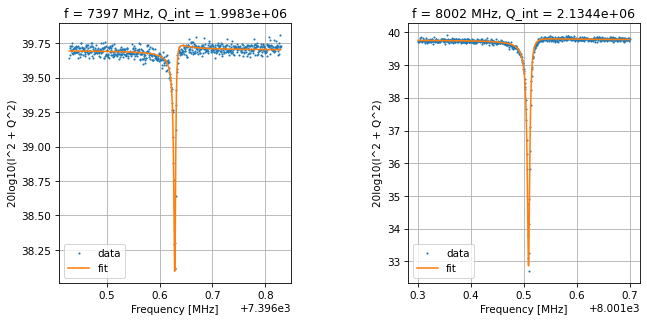

Frequencies out are: [7396.628951632946, 8001.509305082992] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.231 s


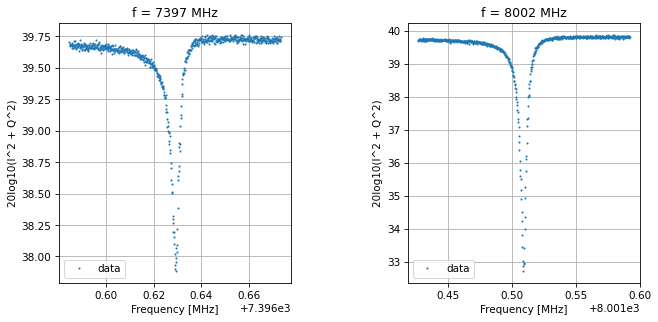

Saving data-2023-11-11-20-28-46
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.442 s


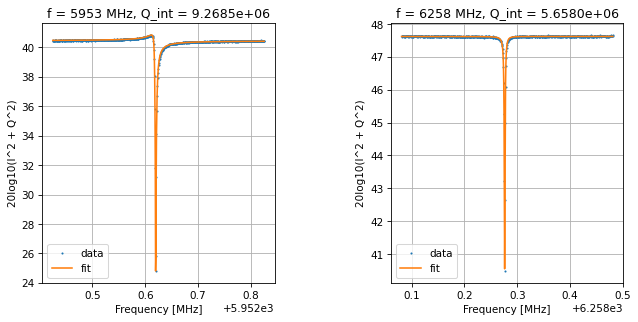

Frequencies out are: [5952.619077399008, 6258.276208030526] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.577 s


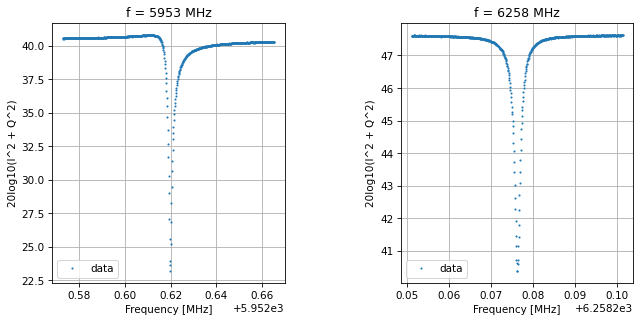

Saving data-2023-11-11-20-29-49
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.552 s


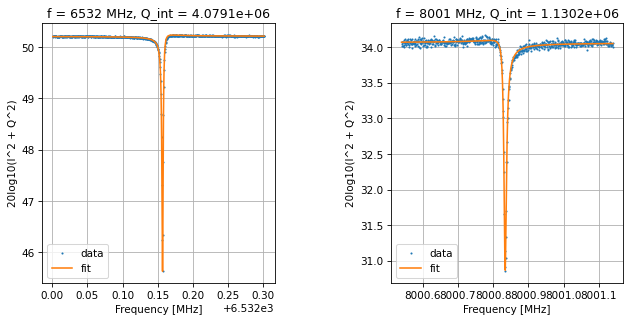

Frequencies out are: [6532.1568970307335, 8000.833526918141] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.555 s


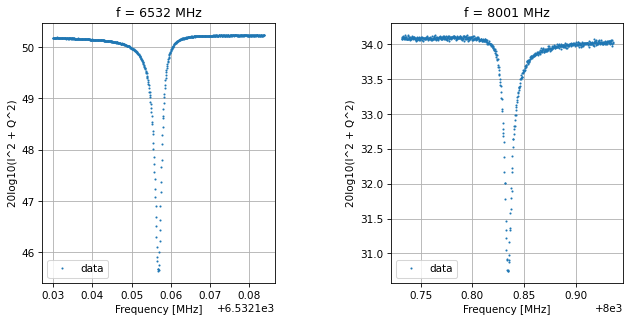

 57%|█████▋    | 8/14 [6:17:25<4:43:18, 2833.09s/it]

Saving data-2023-11-11-20-30-53
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.415 s


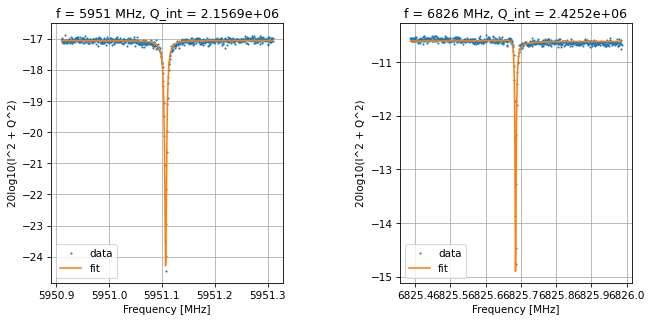

Frequencies out are: [5951.107057205592, 6825.684707507312] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.263 s


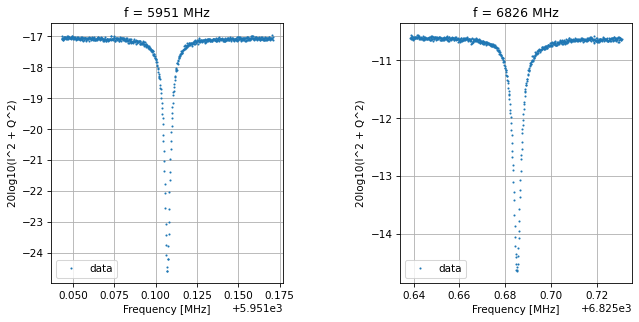

Saving data-2023-11-11-21-11-57
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.808 s


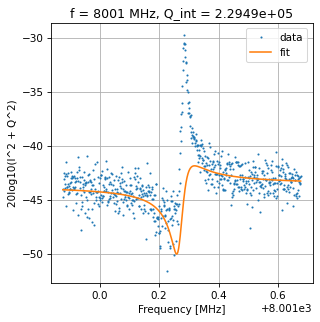

Frequencies out are: [8001.282973452042] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.311 s


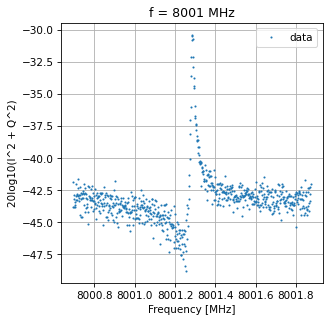

Saving data-2023-11-11-21-12-57
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.701 s


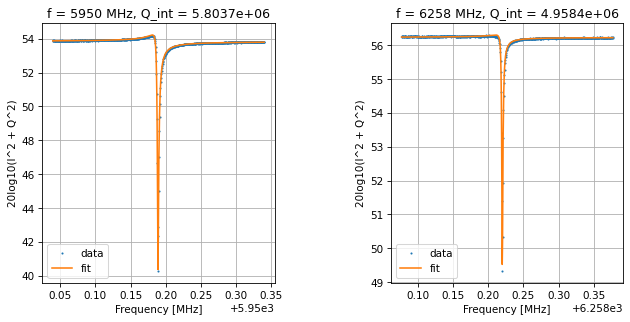

Frequencies out are: [5950.188258622064, 6258.219826207926] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.489 s


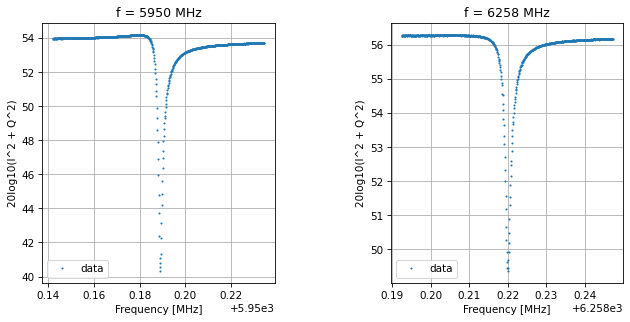

Saving data-2023-11-11-21-13-53
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.610 s


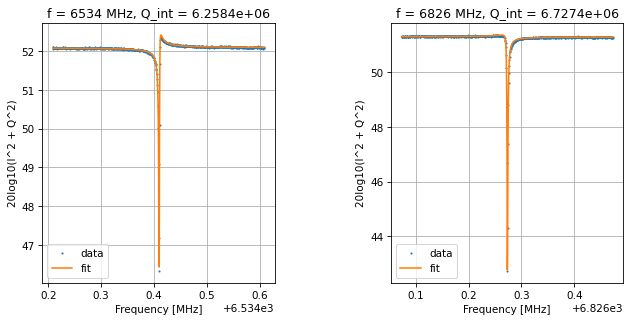

Frequencies out are: [6534.410060353805, 6826.273239379951] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.609 s


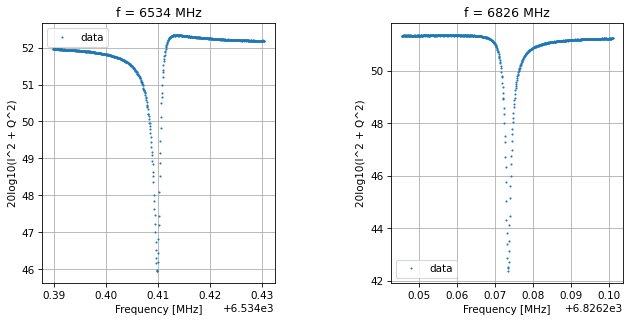

Saving data-2023-11-11-21-14-56
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.489 s


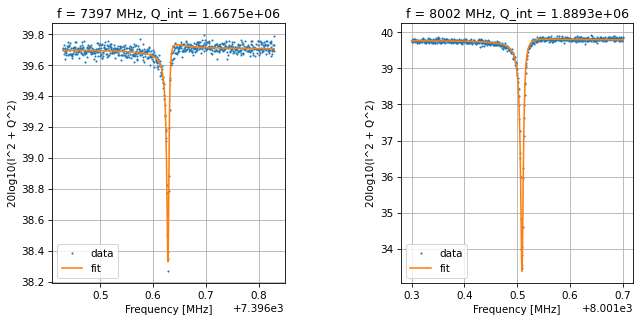

Frequencies out are: [7396.628570478145, 8001.509397556932] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.600 s


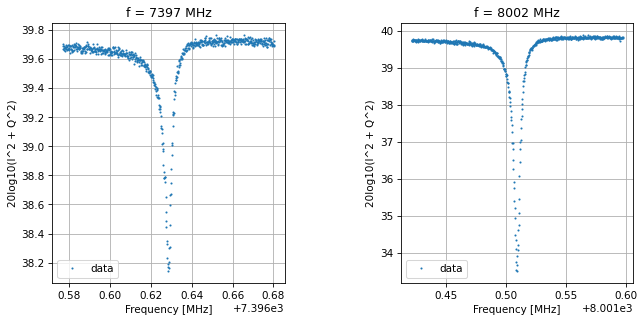

Saving data-2023-11-11-21-16-00
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.385 s


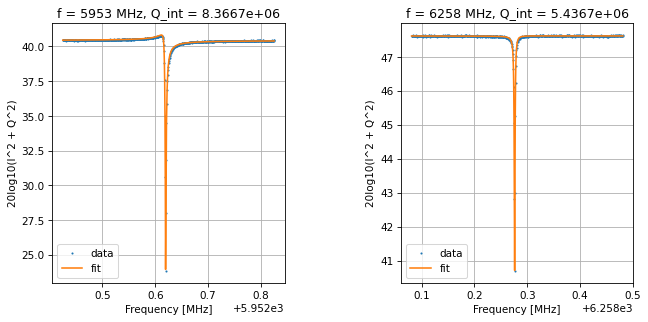

Frequencies out are: [5952.618920998024, 6258.276146256405] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.332 s


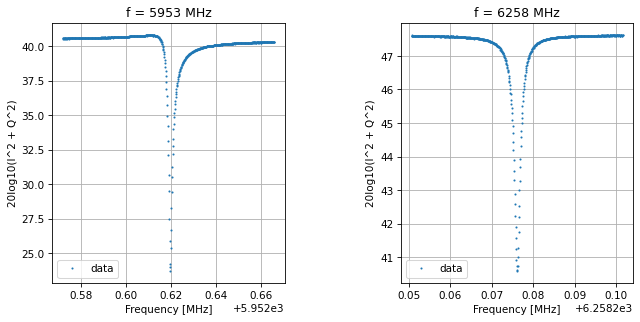

Saving data-2023-11-11-21-17-04
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.432 s


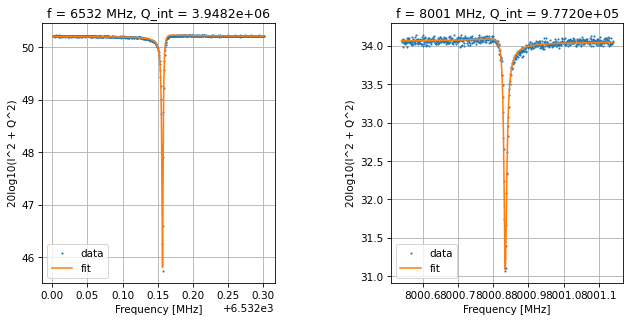

Frequencies out are: [6532.156861555512, 8000.833814115765] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.315 s


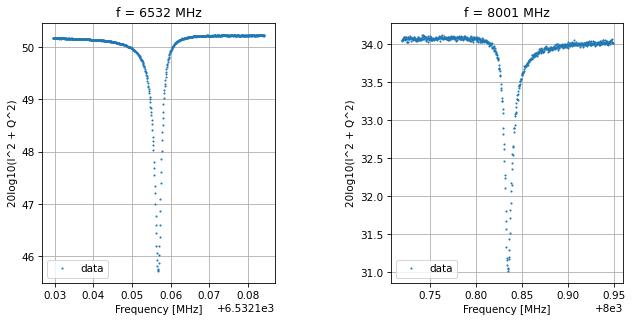

 64%|██████▍   | 9/14 [7:04:40<3:56:07, 2833.60s/it]

Saving data-2023-11-11-21-18-08
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.484 s


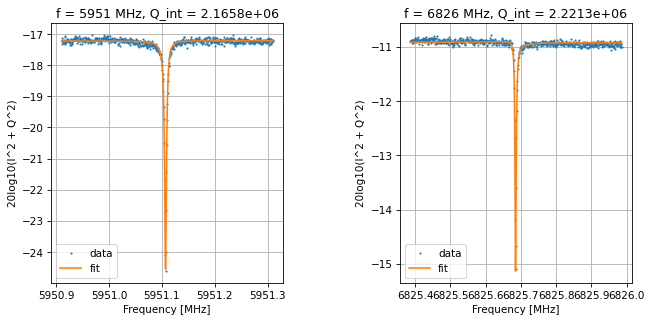

Frequencies out are: [5951.1069251163935, 6825.684651265904] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.489 s


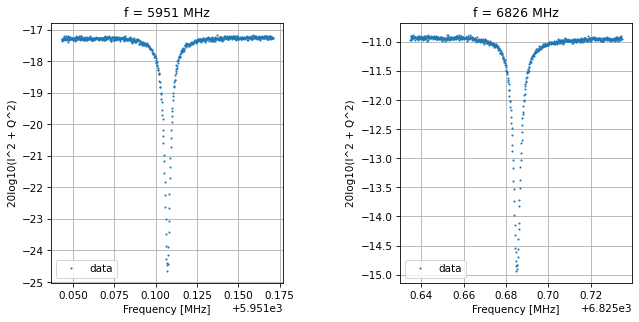

Saving data-2023-11-11-21-59-12
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.761 s


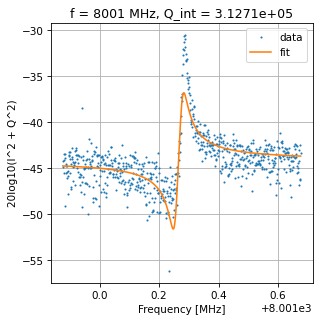

Frequencies out are: [8001.2775214417115] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.503 s


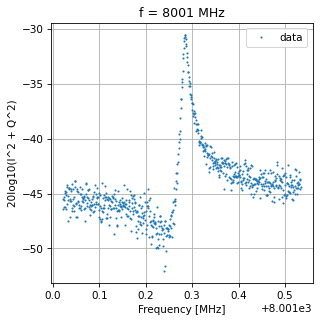

Saving data-2023-11-11-22-00-12
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.470 s


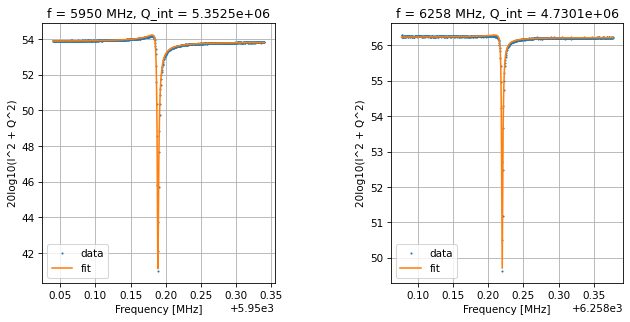

Frequencies out are: [5950.188125278379, 6258.219659775814] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.551 s


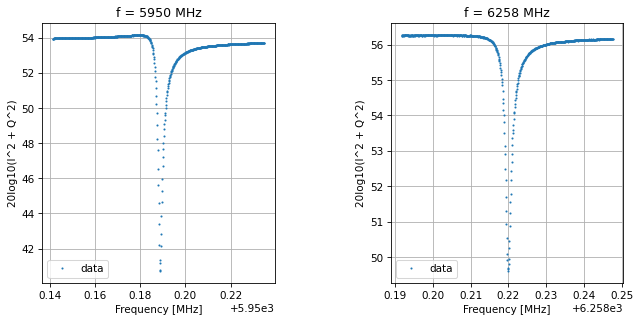

Saving data-2023-11-11-22-01-08
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.348 s


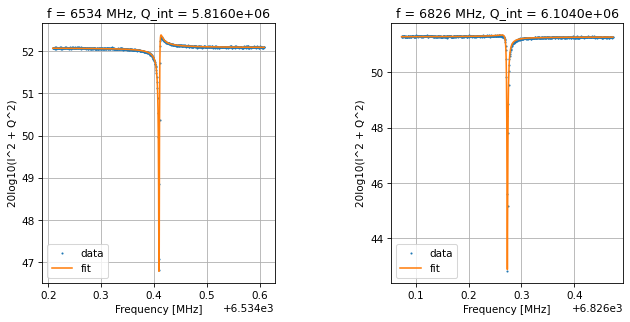

Frequencies out are: [6534.409959102649, 6826.273085369908] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.244 s


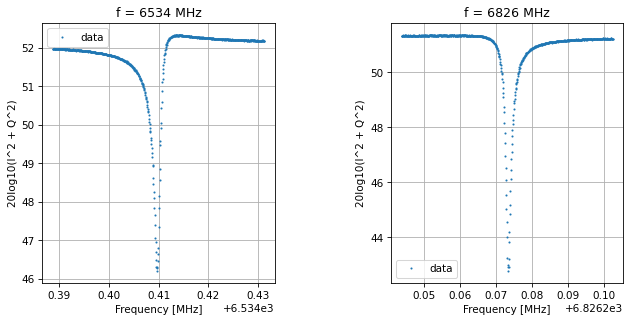

Saving data-2023-11-11-22-02-11
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.119 s


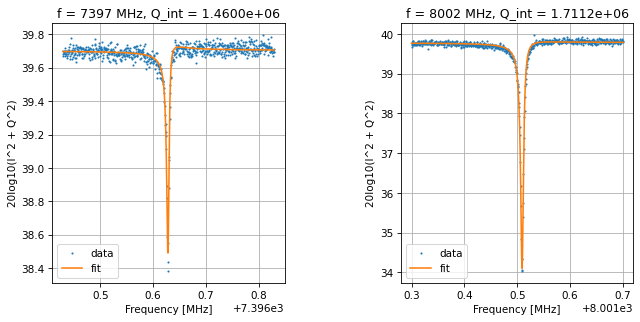

Frequencies out are: [7396.628532662004, 8001.509528563383] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.215 s


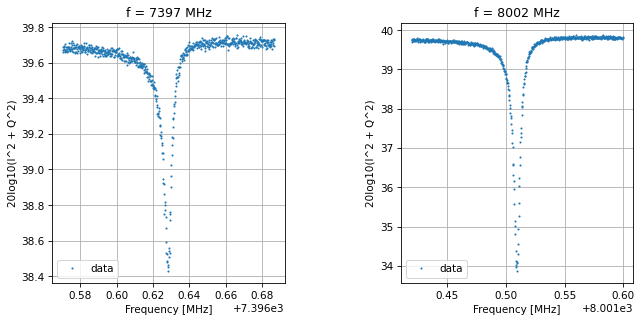

Saving data-2023-11-11-22-03-14
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.440 s


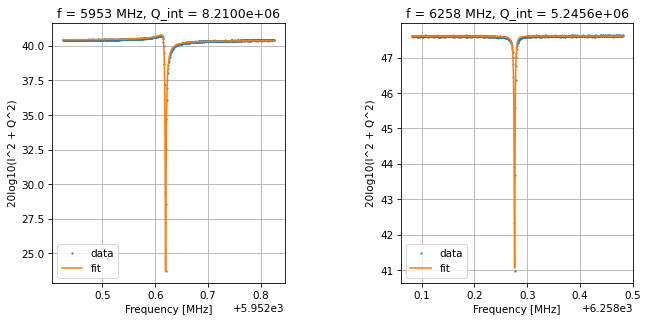

Frequencies out are: [5952.618846694833, 6258.276021570076] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.158 s


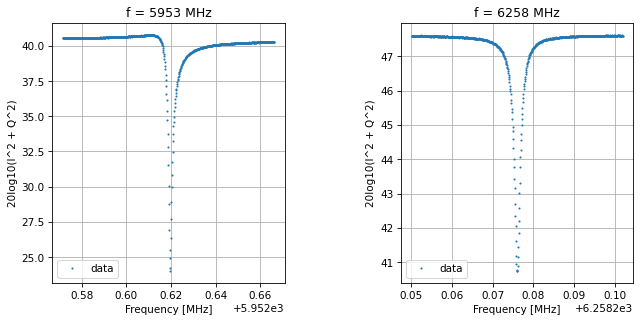

Saving data-2023-11-11-22-04-18
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.555 s


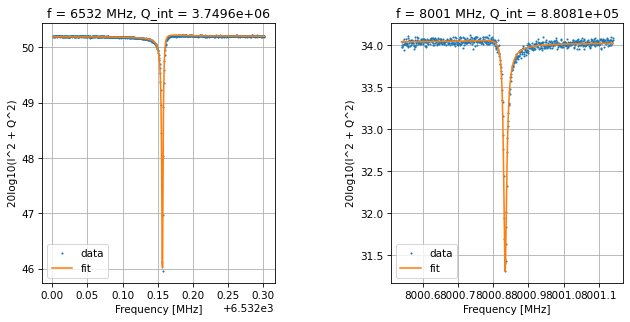

Frequencies out are: [6532.156740362297, 8000.833434271151] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.562 s


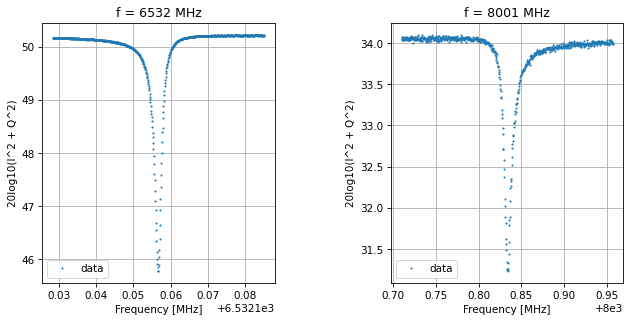

 71%|███████▏  | 10/14 [7:51:53<3:08:54, 2833.52s/it]

Saving data-2023-11-11-22-05-21
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.592 s


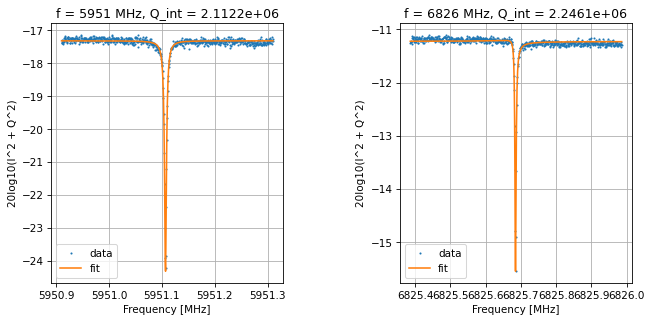

Frequencies out are: [5951.1067495196685, 6825.684444840898] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.480 s


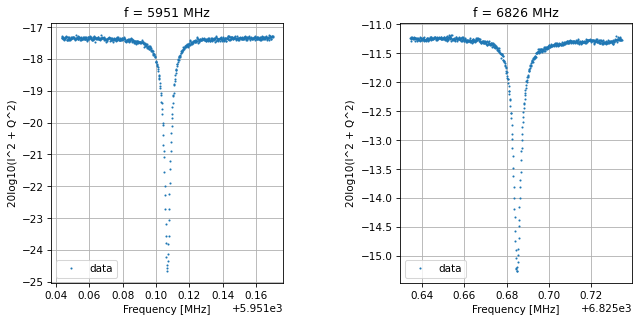

Saving data-2023-11-11-22-46-25
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.857 s


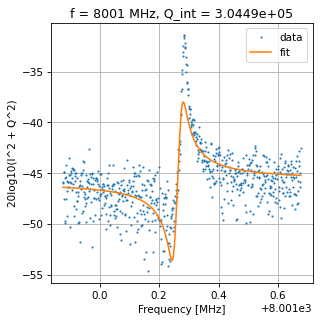

Frequencies out are: [8001.275687049651] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.402 s


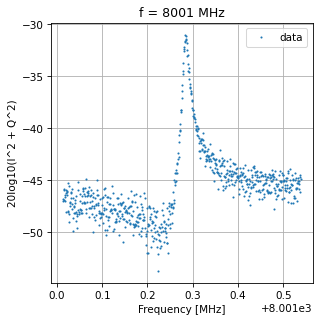

Saving data-2023-11-11-22-47-26
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.511 s


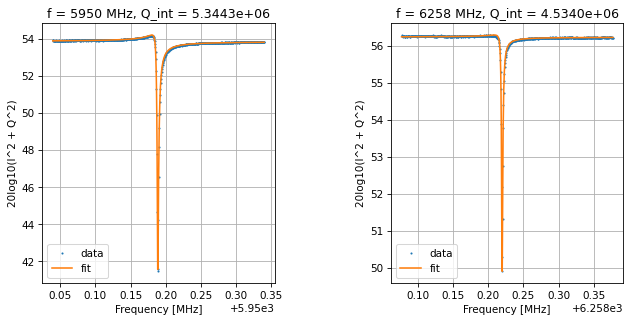

Frequencies out are: [5950.188032123678, 6258.219590802574] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.436 s


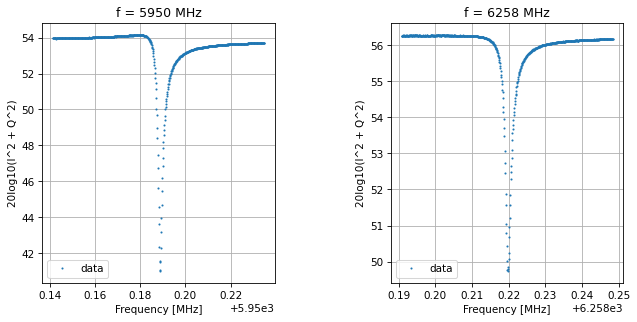

Saving data-2023-11-11-22-48-21
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.515 s


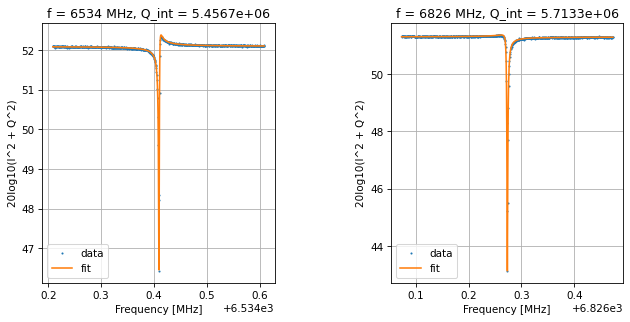

Frequencies out are: [6534.4097747032465, 6826.273034458592] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.674 s


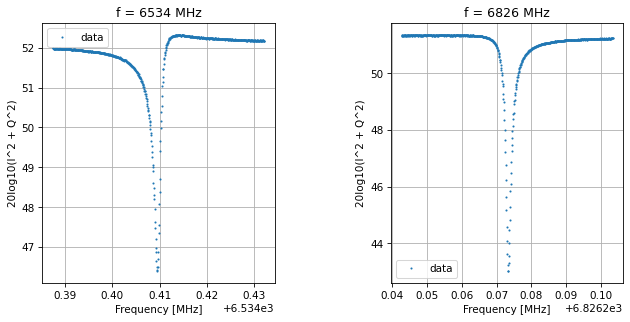

Saving data-2023-11-11-22-49-25
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.488 s


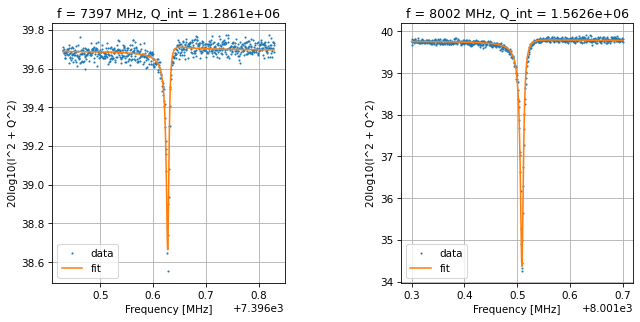

Frequencies out are: [7396.62815570237, 8001.5092706083215] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.417 s


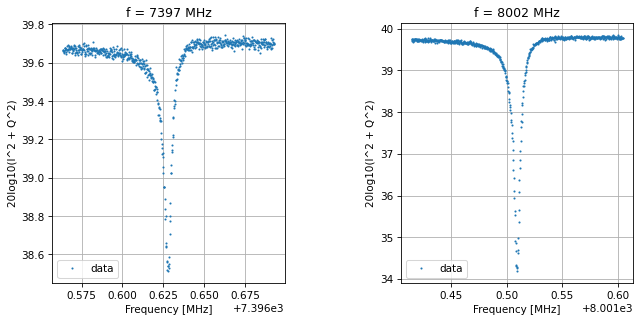

Saving data-2023-11-11-22-50-28
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.535 s


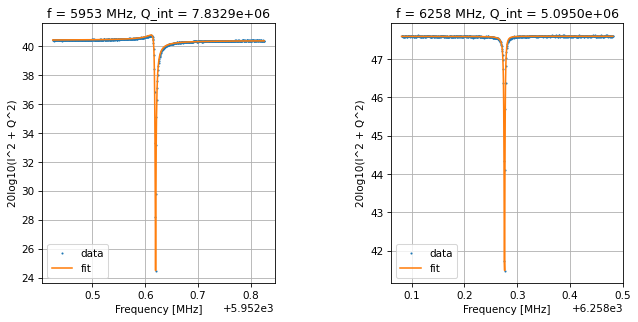

Frequencies out are: [5952.618726368462, 6258.275907794694] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.784 s


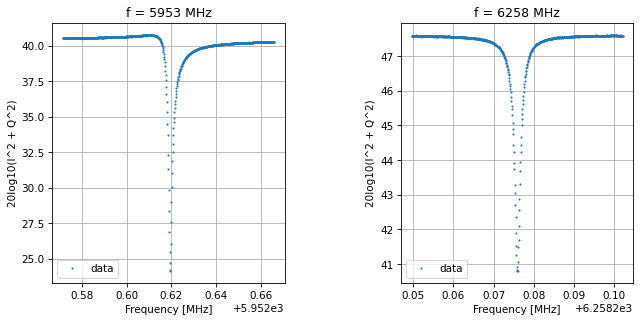

Saving data-2023-11-11-22-51-32
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.477 s


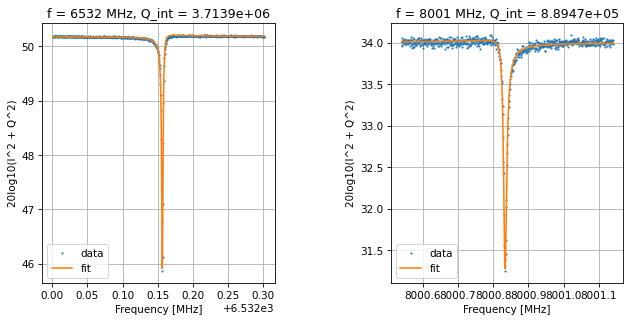

Frequencies out are: [6532.156651222419, 8000.833221169855] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.483 s


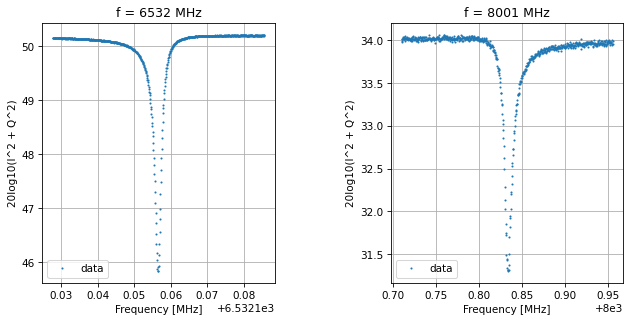

 79%|███████▊  | 11/14 [8:39:08<2:21:41, 2833.99s/it]

Saving data-2023-11-11-22-52-36
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.498 s


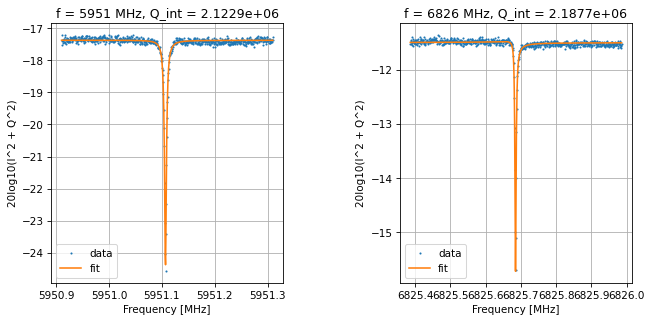

Frequencies out are: [5951.106667150544, 6825.68446752227] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.385 s


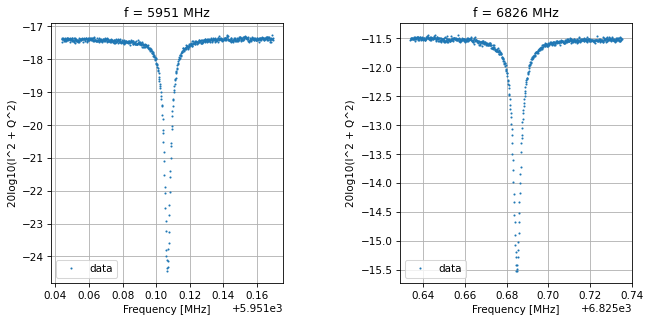

Saving data-2023-11-11-23-33-40
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.816 s


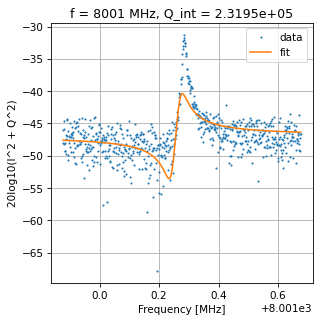

Frequencies out are: [8001.270013689568] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.392 s


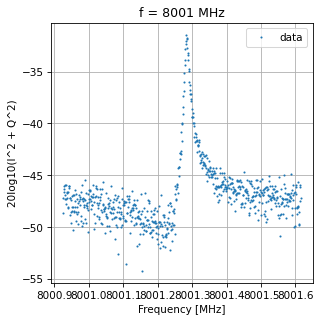

Saving data-2023-11-11-23-34-41
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.466 s


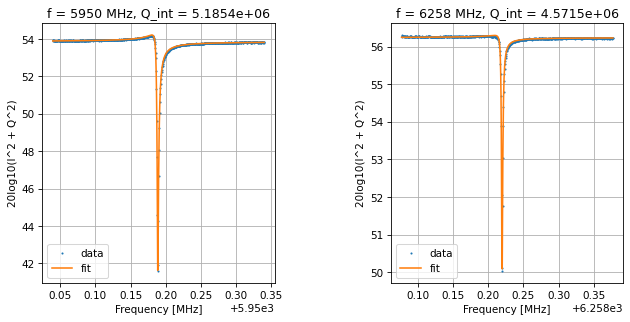

Frequencies out are: [5950.18800035839, 6258.219529238584] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.236 s


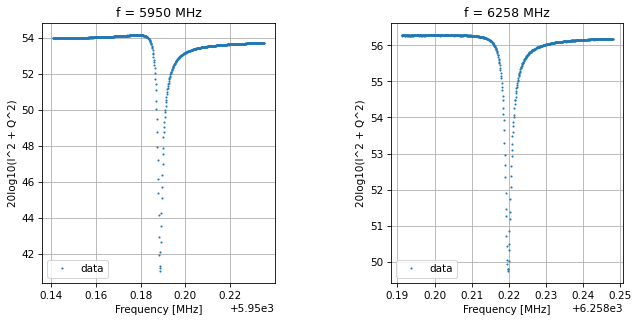

Saving data-2023-11-11-23-35-36
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.492 s


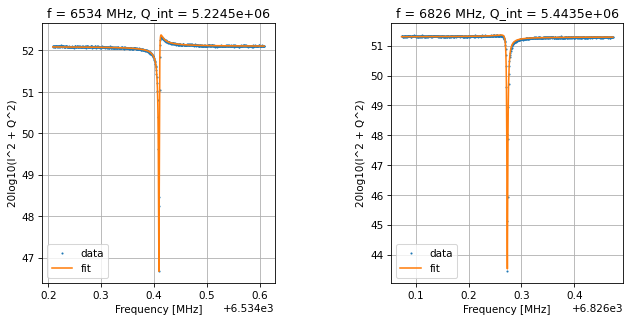

Frequencies out are: [6534.409742303126, 6826.272984474741] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.580 s


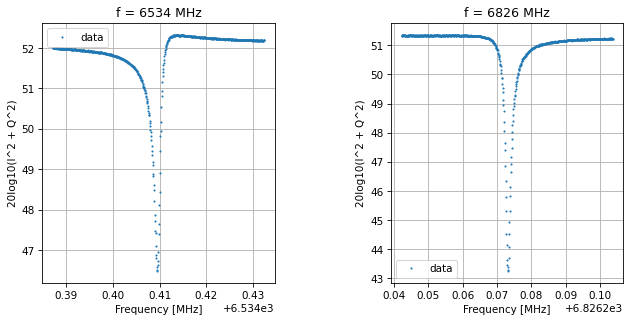

Saving data-2023-11-11-23-36-39
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.603 s


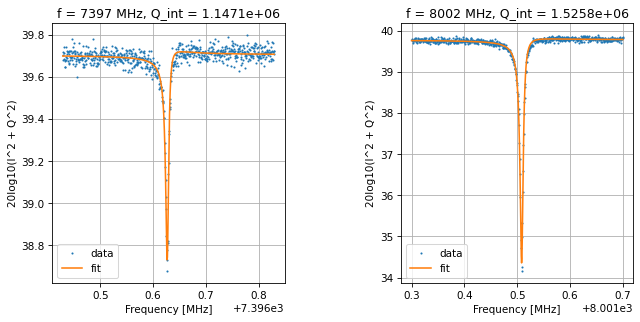

Frequencies out are: [7396.627266712954, 8001.508805618181] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.617 s


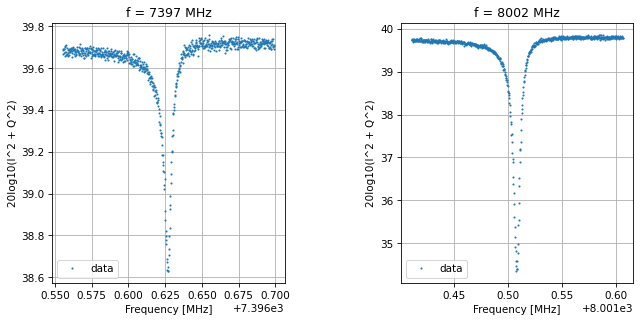

Saving data-2023-11-11-23-37-43
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.417 s


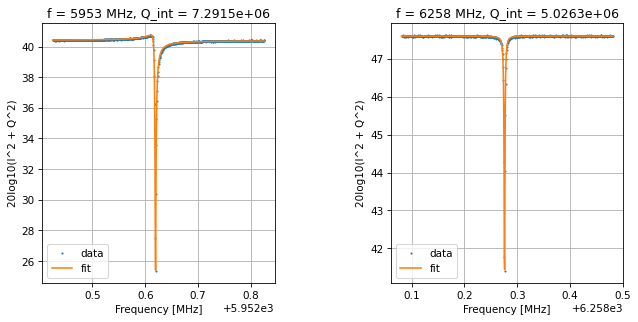

Frequencies out are: [5952.618660319256, 6258.275899079695] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.273 s


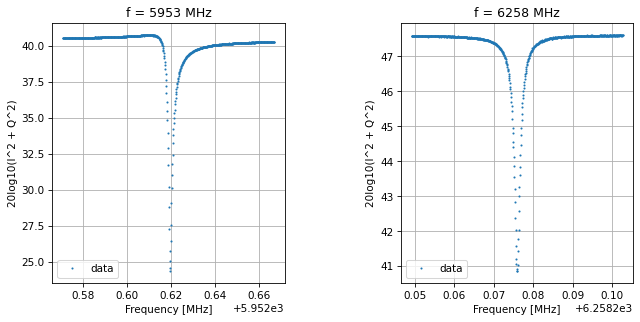

Saving data-2023-11-11-23-38-47
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.392 s


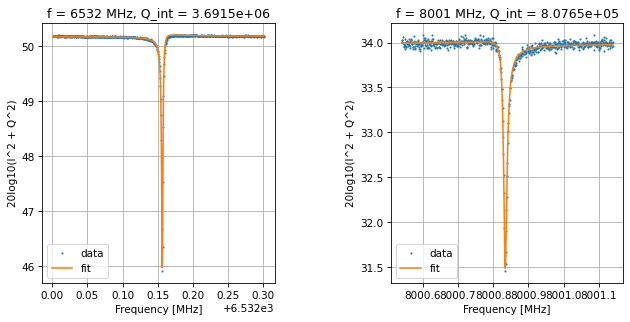

Frequencies out are: [6532.156558955941, 8000.833724083272] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.025 s


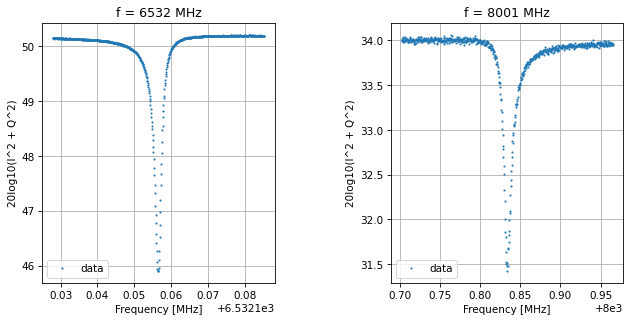

 86%|████████▌ | 12/14 [9:26:22<1:34:27, 2833.90s/it]

Saving data-2023-11-11-23-39-50
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.367 s


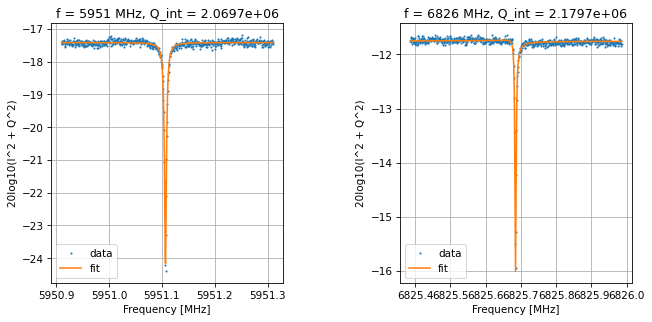

Frequencies out are: [5951.106644359769, 6825.68434115639] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.544 s


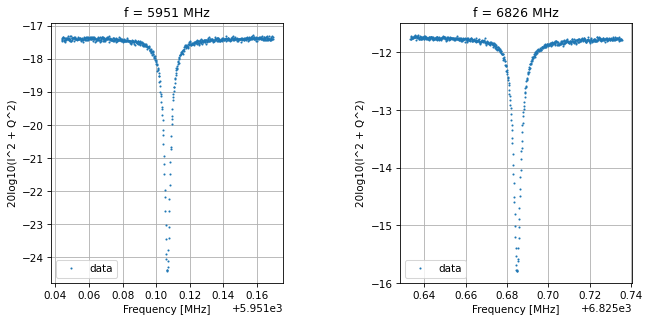

Saving data-2023-11-12-00-20-54
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.792 s


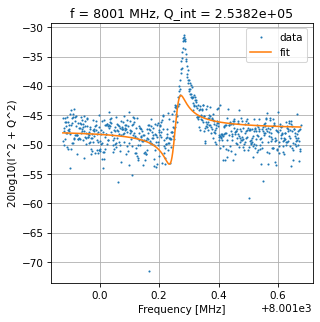

Frequencies out are: [8001.2651711137205] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.605 s


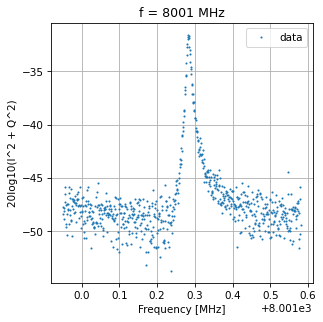

Saving data-2023-11-12-00-21-54
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.542 s


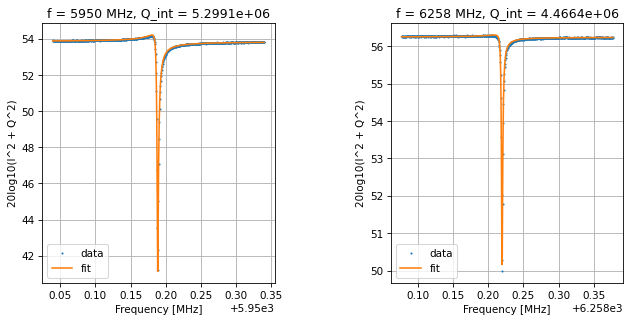

Frequencies out are: [5950.187882022351, 6258.219493730488] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.345 s


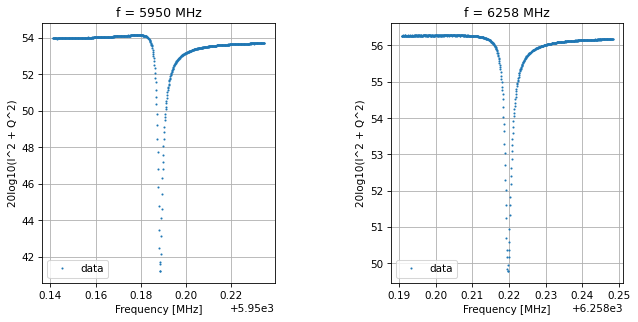

Saving data-2023-11-12-00-22-50
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.642 s


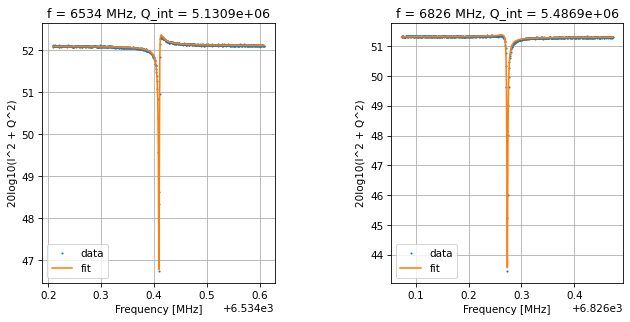

Frequencies out are: [6534.409721574517, 6826.272975945994] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.295 s


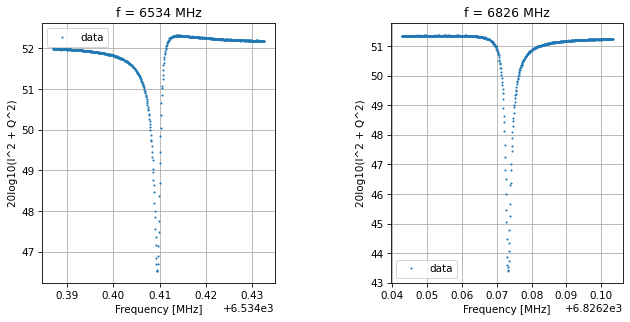

Saving data-2023-11-12-00-23-53
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.476 s


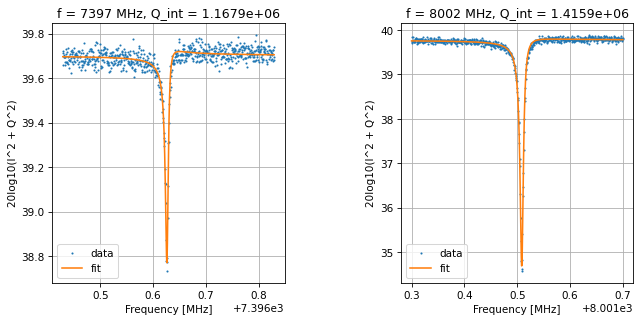

Frequencies out are: [7396.626676591921, 8001.509036346664] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.152 s


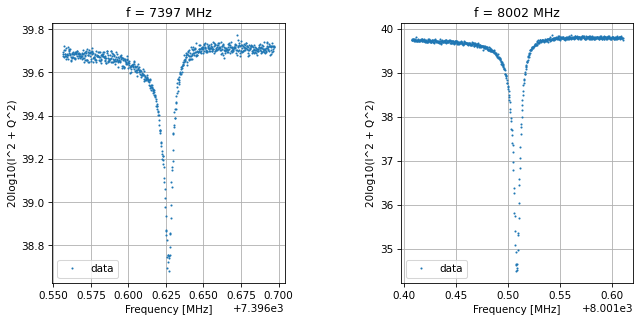

Saving data-2023-11-12-00-24-57
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.514 s


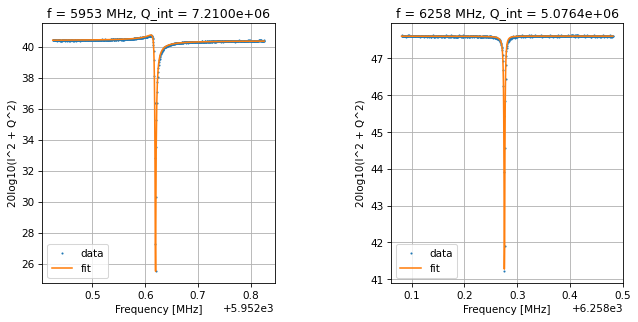

Frequencies out are: [5952.618638139532, 6258.2757874776335] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.113 s


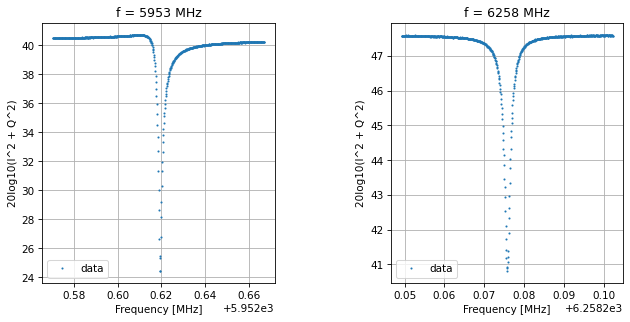

Saving data-2023-11-12-00-26-00
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.454 s


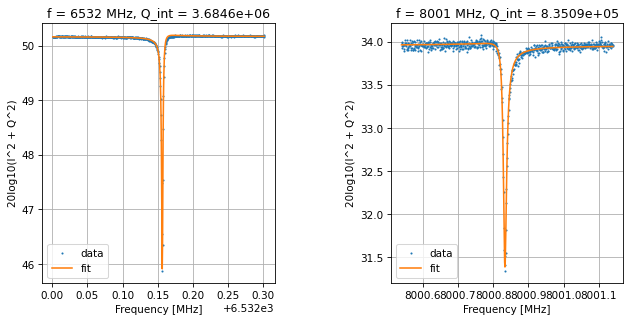

Frequencies out are: [6532.156536368763, 8000.832798926259] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.240 s


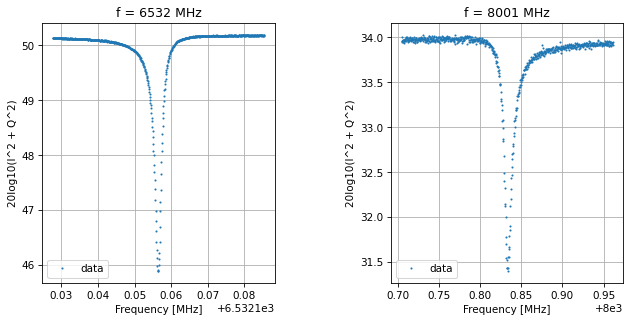

 93%|█████████▎| 13/14 [10:13:35<47:13, 2833.80s/it] 

Saving data-2023-11-12-00-27-04
Frequencies out are: [5951.11, 6825.686] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.566 s


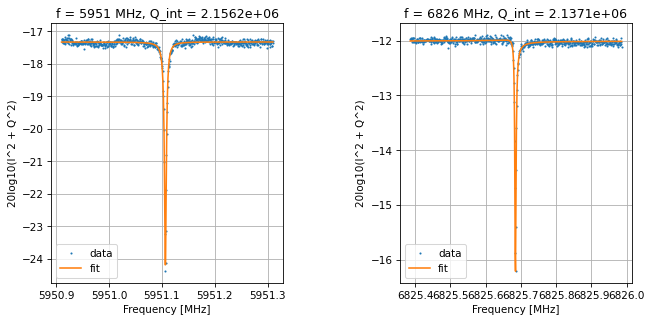

Frequencies out are: [5951.106580140767, 6825.684229656641] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.361 s


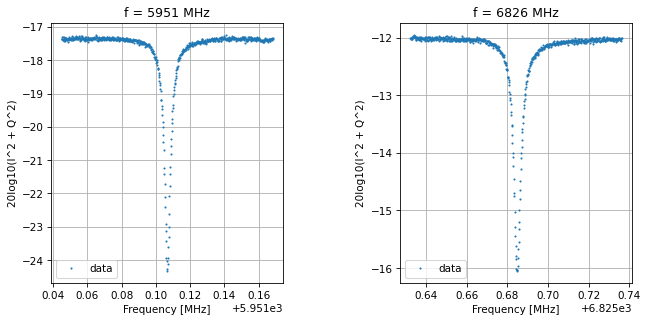

Saving data-2023-11-12-01-08-07
Frequencies out are: [8001.276] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 12.899 s


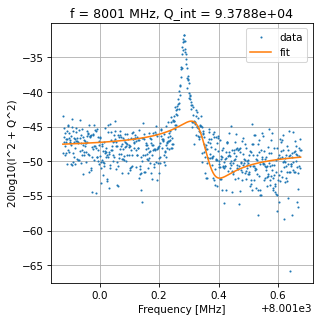

Frequencies out are: [8001.335026175955] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 38.461 s


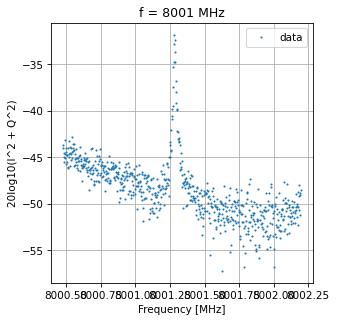

Saving data-2023-11-12-01-09-08
Frequencies out are: [5950.1896, 6258.227] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.488 s


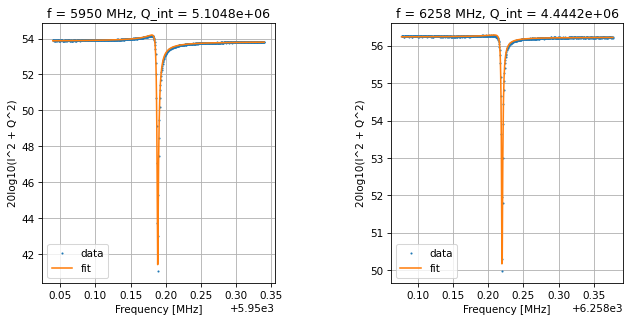

Frequencies out are: [5950.187857907754, 6258.219498124461] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.359 s


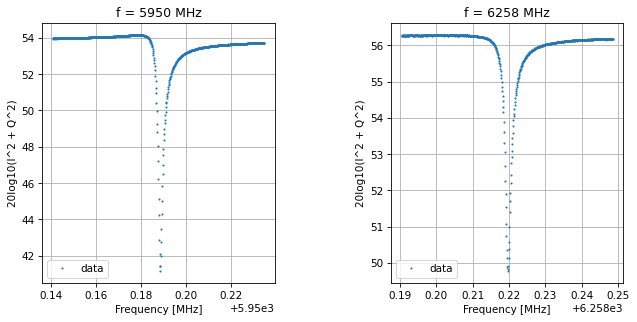

Saving data-2023-11-12-01-10-03
Frequencies out are: [6534.4085, 6826.273] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.406 s


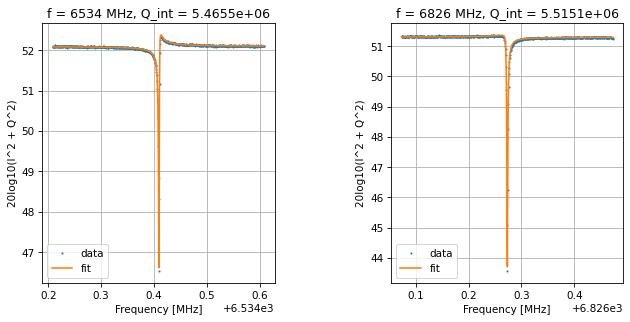

Frequencies out are: [6534.409697584245, 6826.272944038079] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.499 s


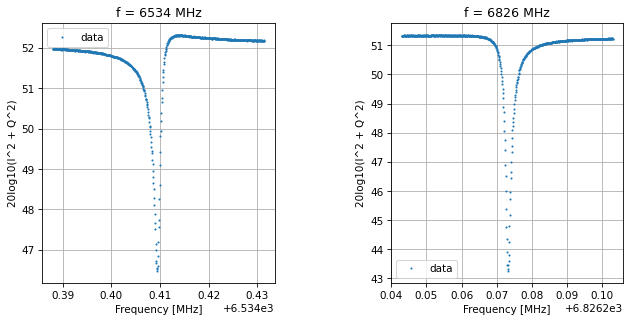

Saving data-2023-11-12-01-11-07
Frequencies out are: [7396.6292, 8001.5] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.316 s


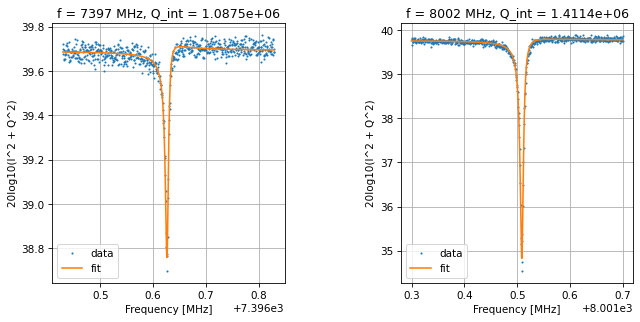

Frequencies out are: [7396.62689245316, 8001.50911145391] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.076 s


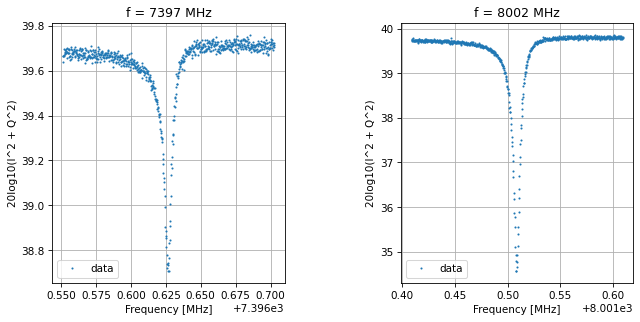

Saving data-2023-11-12-01-12-10
Frequencies out are: [5952.625, 6258.281] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.429 s


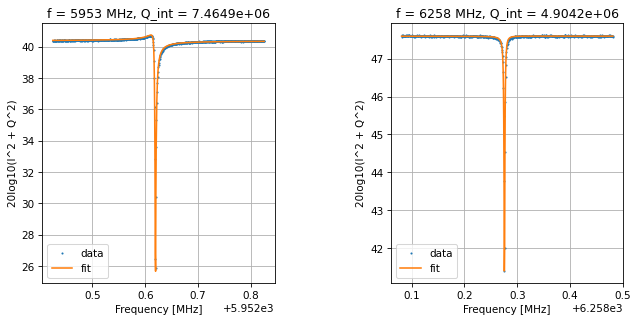

Frequencies out are: [5952.618592694459, 6258.275788108901] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.329 s


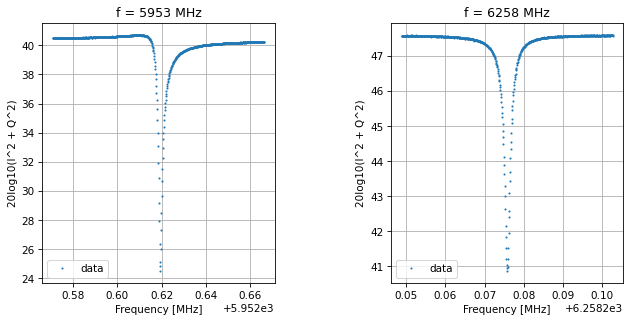

Saving data-2023-11-12-01-13-14
Frequencies out are: [6532.151, 8000.84] MHz


  0%|          | 0/1 [00:00<?, ?it/s]

Final time = 15.403 s


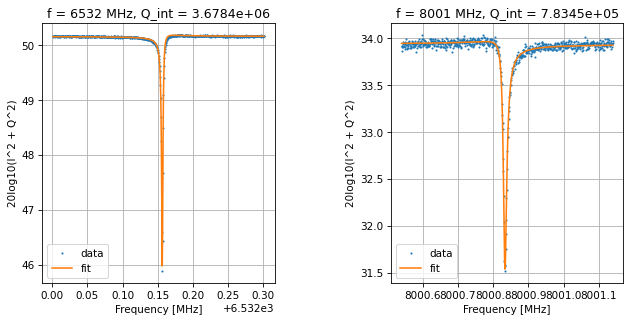

Frequencies out are: [6532.15651723225, 8000.832901112528] MHz


  0%|          | 0/3 [00:00<?, ?it/s]

Final time = 46.170 s


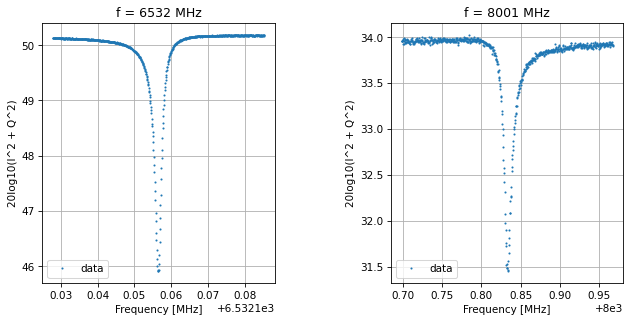

100%|██████████| 14/14 [11:00:49<00:00, 2832.08s/it]

Saving data-2023-11-12-01-14-17
Time for measurement:
11:00:49.171117


In [7]:
# remember to check that lakeshore is on PID mode and current heater range is correct
# set temperatures
temps = np.arange(.170,.7,.03)
print(temps)

time.sleep(4*60*60)


# Main for loop:
start_time = time.time()
run_FFS(temps, socs, chipDicts, soccfgs, turbo=False)
end_time = time.time()
print('Time for measurement:')
print(datetime.timedelta(seconds=end_time-start_time))

In [20]:
tc.setTemp(0)